# Objective is (1.want to compare population, GDP of the world in 2023, compare GDP between Cambodia with Asian 2. Compare population in Asia, so on)

# 3.1 Import some libraries

In [1]:
### Data Wrangling 

import numpy as np
import pandas as pd
from collections import Counter
from collections import OrderedDict

### Preprocessing 

import statsmodels.api as sm
from scipy import stats
### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Modeling
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR




# Selection data

In [2]:
#dataset1= pd.read_csv('D:\Lessson_Master_ITC\EDA\Assignment\Global\GDP_Predict.csv')
# Strip extra spaces from the 'Region' values and filter the DataFrame
#dataset2 = dataset1[dataset1['Region'].str.strip() == "ASIA (EX. NEAR EAST)"]
#dataset2.Country = dataset2.Country.str.strip().str.lower()

#print(dataset2.Country.unique())

#dataset2[dataset2['Country'].isin(['cambodia','vietnam','korea, south'])]

# Loading/Import dataset

In [3]:
dataset= pd.read_csv('D:\Lessson_Master_ITC\EDA\Assignment\Global\GDP_Predict.csv')
dataset.head(10)

,Country,Region,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,"23,06",700.0,"36,0","12,13","0,22",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,"-4,93",4500.0,"86,5","21,09","4,42",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,"-0,39",6000.0,"70,0","3,22","0,25",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,"-20,71",8000.0,"97,0",10,15,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,"6,6",19000.0,"100,0","2,22",0,3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,0,1900.0,"42,0","2,41","0,24",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,"10,76",8600.0,"95,0",0,0,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,"-6,15",11000.0,"89,0","18,18","4,55",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,"0,61",11200.0,"97,1","12,31","0,48",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,"-6,47",3500.0,"98,6","17,55","2,3",4,"12,07","8,23","0,239","0,343","0,418"


In [4]:
### Shape of the dataset

dataset.shape

(227, 14)

In [5]:
dataset.head(10)

,Country,Region,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,"23,06",700.0,"36,0","12,13","0,22",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,"-4,93",4500.0,"86,5","21,09","4,42",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,"-0,39",6000.0,"70,0","3,22","0,25",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,"-20,71",8000.0,"97,0",10,15,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,"6,6",19000.0,"100,0","2,22",0,3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,0,1900.0,"42,0","2,41","0,24",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,"10,76",8600.0,"95,0",0,0,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,"-6,15",11000.0,"89,0","18,18","4,55",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,"0,61",11200.0,"97,1","12,31","0,48",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,"-6,47",3500.0,"98,6","17,55","2,3",4,"12,07","8,23","0,239","0,343","0,418"


In [6]:
### Mean sales per each Manufacturer 

mean_sales_Country = dataset[['Country', 'Population']].groupby('Country', as_index = False).mean()
mean_sales_Country

,Country,Population
0,Afghanistan,31056997.0
1,Albania,3581655.0
2,Algeria,32930091.0
3,American Samoa,57794.0
4,Andorra,71201.0
...,...,...
222,West Bank,2460492.0
223,Western Sahara,273008.0
224,Yemen,21456188.0
225,Zambia,11502010.0


The dataset consists of 15 columns and 227 rows.

#  Exploration Data Analysis EDA

# 3.1 Datatypes, Missing Data, and Summary Statistics

In [7]:
### Looking at the datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             227 non-null    object 
 1   Region              227 non-null    object 
 2   Population          227 non-null    int64  
 3   Net_migration       224 non-null    object 
 4   GDP_in_thousand     226 non-null    float64
 5   Literacy            209 non-null    object 
 6   Arable_Percentage   225 non-null    object 
 7   Crops_Percentage    225 non-null    object 
 8   Climate             205 non-null    object 
 9   Birthrate           224 non-null    object 
 10  Deathrate           223 non-null    object 
 11  Agriculture         212 non-null    object 
 12  Industry            211 non-null    object 
 13  Service             212 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 25.0+ KB


# Transform Objects to floats data

In [8]:
dataset["Deathrate"]=dataset["Deathrate"].apply(func=lambda s: float("".join(str(s).split(","))))
dataset["Agriculture"]=dataset["Agriculture"].apply(func=lambda s: float("".join(str(s).split(","))))
dataset["Industry"]=dataset["Industry"].apply(func=lambda s: float("".join(str(s).split(","))))
dataset["Service"]=dataset["Service"].apply(func=lambda s: float("".join(str(s).split(","))))
dataset["Net_migration"]=dataset["Net_migration"].apply(func=lambda s: float("".join(str(s).split(","))))
dataset["Birthrate"]=dataset["Birthrate"].apply(func=lambda s: float("".join(str(s).split(","))))
dataset["Climate"]=dataset["Climate"].apply(func=lambda s: float("".join(str(s).split(","))))
dataset["Crops_Percentage"]=dataset["Crops_Percentage"].apply(func=lambda s: float("".join(str(s).split(","))))


In [9]:
dataset["Literacy"]=dataset["Literacy"].apply(func=lambda s: float("".join(str(s).split(","))))
dataset["Arable_Percentage "]=dataset["Arable_Percentage "].apply(func=lambda s: float("".join(str(s).split(","))))



In [10]:
dataset.describe()

,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,224.000000,226.000000,209.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,12.129464,9689.823009,828.382775,1162.231111,413.702222,2.995122,2042.803571,818.959641,107.330189,219.753555,408.929245
std,1.178913e+08,477.016425,10049.138513,197.221729,1274.360827,816.014194,3.729187,1228.923356,506.705996,126.380132,172.054188,267.268560
min,7.026000e+03,-2099.000000,500.000000,176.000000,0.000000,0.000000,1.000000,10.000000,22.000000,0.000000,1.000000,4.000000
25%,4.376240e+05,-68.000000,1900.000000,706.000000,169.000000,9.000000,2.000000,1077.000000,517.500000,16.500000,36.500000,73.750000
50%,4.786994e+06,0.000000,5550.000000,925.000000,696.000000,89.000000,2.000000,1799.500000,713.000000,55.000000,231.000000,475.500000
75%,1.749777e+07,88.250000,15700.000000,980.000000,1755.000000,417.000000,3.000000,2934.500000,1025.500000,163.500000,312.000000,619.750000
max,1.313974e+09,2306.000000,55100.000000,1000.000000,6211.000000,5068.000000,25.000000,5073.000000,2974.000000,769.000000,906.000000,954.000000


# 3.3 Feature Analysis

# 3.3.1  Countries (Category variable)

In [11]:
### Value counts of the column -Country

Country_count = dataset['Country'].value_counts(dropna = False)
Country_count

Country
Afghanistan     1
Rwanda          1
Nauru           1
Nepal           1
Netherlands     1
               ..
Greece          1
Greenland       1
Grenada         1
Guadeloupe      1
Zimbabwe        1
Name: count, Length: 227, dtype: int64

In [12]:
### Value counts of the column - Region

Region_count = dataset['Region'].value_counts(dropna = False)
Region_count

Region
SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: count, dtype: int64

In [13]:
climate_mapping = {1: 1, 1.5: 2, 2: 3, 2.5: 4, 3: 5, 4: 6}
dataset['Climate'] = dataset['Climate'].replace(climate_mapping)
dataset.Climate.value_counts().sort_index()

Climate
1.0      29
3.0     111
5.0      48
6.0       6
15.0      8
25.0      3
Name: count, dtype: int64

In [14]:
dataset.head(10)

,Country,Region,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,2306.0,700.0,360.0,1213.0,22.0,1.0,466.0,2034.0,38.0,24.0,38.0
1,Albania,EASTERN EUROPE,3581655,-493.0,4500.0,865.0,2109.0,442.0,5.0,1511.0,522.0,232.0,188.0,579.0
2,Algeria,NORTHERN AFRICA,32930091,-39.0,6000.0,700.0,322.0,25.0,1.0,1714.0,461.0,101.0,6.0,298.0
3,American Samoa,OCEANIA,57794,-2071.0,8000.0,970.0,10.0,15.0,3.0,2246.0,327.0,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,66.0,19000.0,1000.0,222.0,0.0,5.0,871.0,625.0,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,0.0,1900.0,420.0,241.0,24.0,NaN,4511.0,242.0,96.0,658.0,246.0
6,Anguilla,LATIN AMER. & CARIB,13477,1076.0,8600.0,950.0,0.0,0.0,3.0,1417.0,534.0,4.0,18.0,78.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,-615.0,11000.0,890.0,1818.0,455.0,3.0,1693.0,537.0,38.0,22.0,743.0
8,Argentina,LATIN AMER. & CARIB,39921833,61.0,11200.0,971.0,1231.0,48.0,5.0,1673.0,755.0,95.0,358.0,547.0
9,Armenia,C.W. OF IND. STATES,2976372,-647.0,3500.0,986.0,1755.0,23.0,6.0,1207.0,823.0,239.0,343.0,418.0


# Population Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\1822074410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Population'], label = 'Skewness: %.2f'%(dataset['Population'].skew()))


Text(0.5, 1.0, 'Distribution of the column -Population')

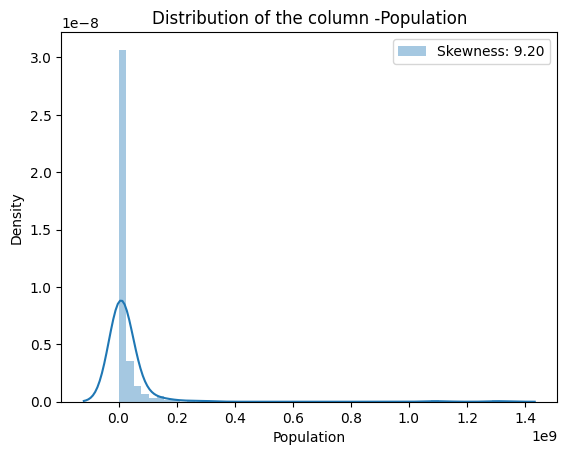

In [15]:
### Understanding the distribution of the column - Population

sns.distplot(dataset['Population'], label = 'Skewness: %.2f'%(dataset['Population'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column -Population')



# Net_migration Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\1713728366.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Net_migration'], label = 'Skewness: %.2f'%(dataset['Net_migration'].skew()))


Text(0.5, 1.0, 'Distribution of the column -Net_migration')

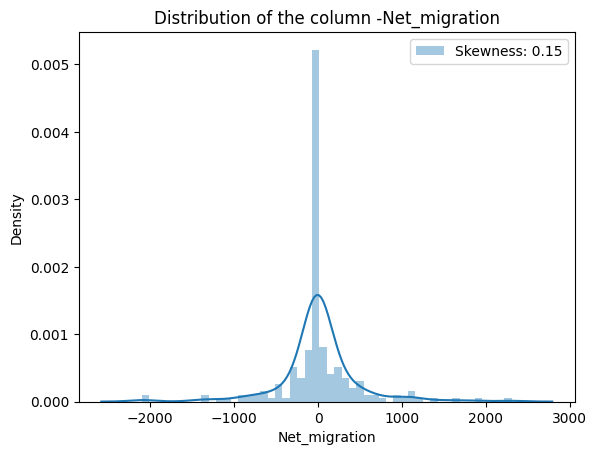

In [16]:
### Understanding the distribution of the column - Population

sns.distplot(dataset['Net_migration'], label = 'Skewness: %.2f'%(dataset['Net_migration'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column -Net_migration')

# GDP_In_thousand

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\2188970689.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['GDP_in_thousand'], label = 'Skewness: %.2f'%(dataset['GDP_in_thousand'].skew()))


Text(0.5, 1.0, 'Distribution of the column -GDP_in_thousand')

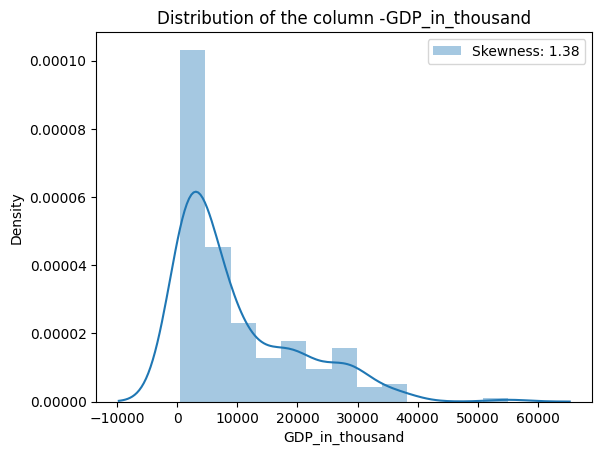

In [17]:
### Understanding the distribution of the column - Population

sns.distplot(dataset['GDP_in_thousand'], label = 'Skewness: %.2f'%(dataset['GDP_in_thousand'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column -GDP_in_thousand')

# Birth rate Feature

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\2911686046.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Birthrate'], label = 'Skewness: %.2f'%(dataset['Birthrate'].skew()))


Text(0.5, 1.0, 'Distribution of the column -Birthrate')

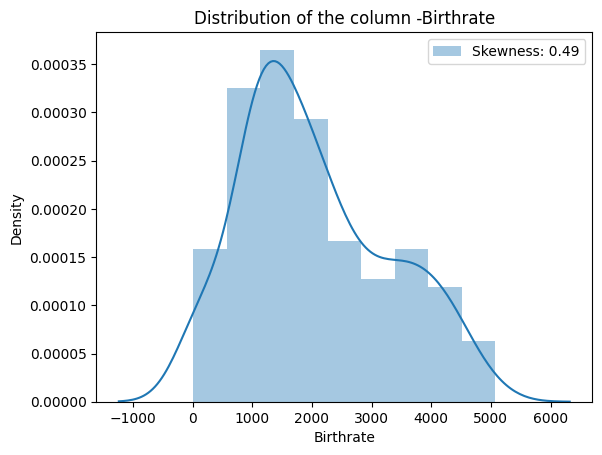

In [18]:
### Understanding the distribution of the column - Population

sns.distplot(dataset['Birthrate'], label = 'Skewness: %.2f'%(dataset['Birthrate'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column -Birthrate')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\848045881.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Deathrate'], label = 'Skewness: %.2f'%(dataset['Deathrate'].skew()))


Text(0.5, 1.0, 'Distribution of the column -Deathrate')

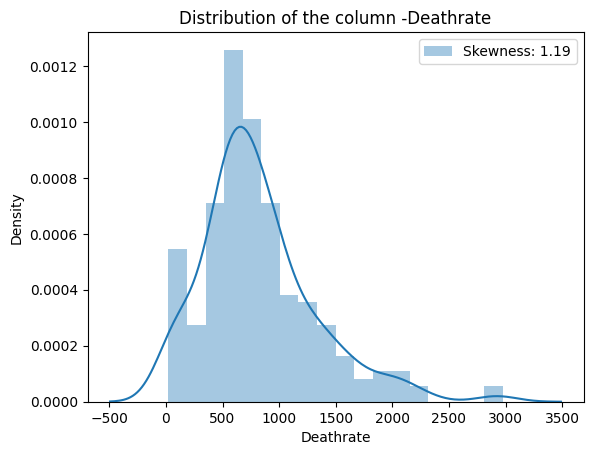

In [19]:
sns.distplot(dataset['Deathrate'], label = 'Skewness: %.2f'%(dataset['Deathrate'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column -Deathrate')

# Data Visualization by Global

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\1934420766.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gdp_countries.head(20), x='Country', y='GDP_in_thousand', palette='cool_r')


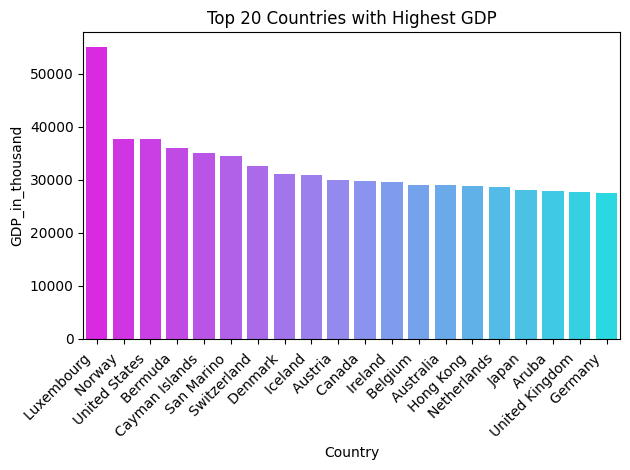

In [20]:
import seaborn as sns

# Sort the DataFrame by GDP_in_thousand column in descending order and get the top 20 rows
top_gdp_countries = dataset.sort_values(by='GDP_in_thousand', ascending=False)

# Create a bar plot to visualize GDP for top countries
sns.barplot(data=top_gdp_countries.head(20), x='Country', y='GDP_in_thousand', palette='cool_r')
plt.title('Top 20 Countries with Highest GDP')
plt.xlabel('Country')
plt.ylabel('GDP_in_thousand')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## data Visualization

In [21]:
#dataset5= pd.read_csv('D:\Lessson_Master_ITC\EDA\Assignment\Global\GDP_Predict.csv')
# Strip extra spaces from the 'Region' values and filter the DataFrame
dataset2 = dataset[dataset['Region'].str.strip() == "ASIA (EX. NEAR EAST)"]
dataset2.Country = dataset2.Country.str.strip().str.lower()

print(dataset2.Country.unique())

dataset2[dataset2['Country'].isin(['cambodia','vietnam','thailand','singapore','laos','brunei','indonesia','philippines','malaysia','burma','east timor'])]

['afghanistan' 'bangladesh' 'bhutan' 'brunei' 'burma' 'cambodia' 'china'
 'east timor' 'hong kong' 'india' 'indonesia' 'iran' 'japan'
 'korea, north' 'korea, south' 'laos' 'macau' 'malaysia' 'maldives'
 'mongolia' 'nepal' 'pakistan' 'philippines' 'singapore' 'sri lanka'
 'taiwan' 'thailand' 'vietnam']


C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\1684885611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.Country = dataset2.Country.str.strip().str.lower()


,Country,Region,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
29,brunei,ASIA (EX. NEAR EAST),379444,359.0,18600.0,939.0,57.0,76.0,3.0,1879.0,345.0,36.0,561.0,403.0
32,burma,ASIA (EX. NEAR EAST),47382633,-18.0,1800.0,853.0,1519.0,97.0,3.0,1791.0,983.0,564.0,82.0,353.0
34,cambodia,ASIA (EX. NEAR EAST),13881427,0.0,1900.0,694.0,2096.0,61.0,3.0,269.0,906.0,35.0,3.0,35.0
58,east timor,ASIA (EX. NEAR EAST),1062777,0.0,500.0,586.0,471.0,67.0,3.0,2699.0,624.0,85.0,231.0,684.0
95,indonesia,ASIA (EX. NEAR EAST),245452739,0.0,3200.0,879.0,1132.0,723.0,3.0,2034.0,625.0,134.0,458.0,408.0
113,laos,ASIA (EX. NEAR EAST),6368481,0.0,1700.0,664.0,38.0,35.0,3.0,3549.0,1155.0,455.0,287.0,258.0
126,malaysia,ASIA (EX. NEAR EAST),24385858,0.0,9000.0,887.0,548.0,1761.0,3.0,2286.0,505.0,84.0,48.0,436.0
162,philippines,ASIA (EX. NEAR EAST),89468677,-15.0,4600.0,926.0,1895.0,1677.0,3.0,2489.0,541.0,144.0,326.0,53.0
184,singapore,ASIA (EX. NEAR EAST),4492150,1153.0,23700.0,925.0,164.0,0.0,3.0,934.0,428.0,0.0,339.0,661.0
201,thailand,ASIA (EX. NEAR EAST),64631595,0.0,7400.0,926.0,2936.0,646.0,3.0,1387.0,704.0,99.0,441.0,46.0


C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\693467553.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gdp_countries, x='Country', y='GDP_in_thousand', palette='cool_r')


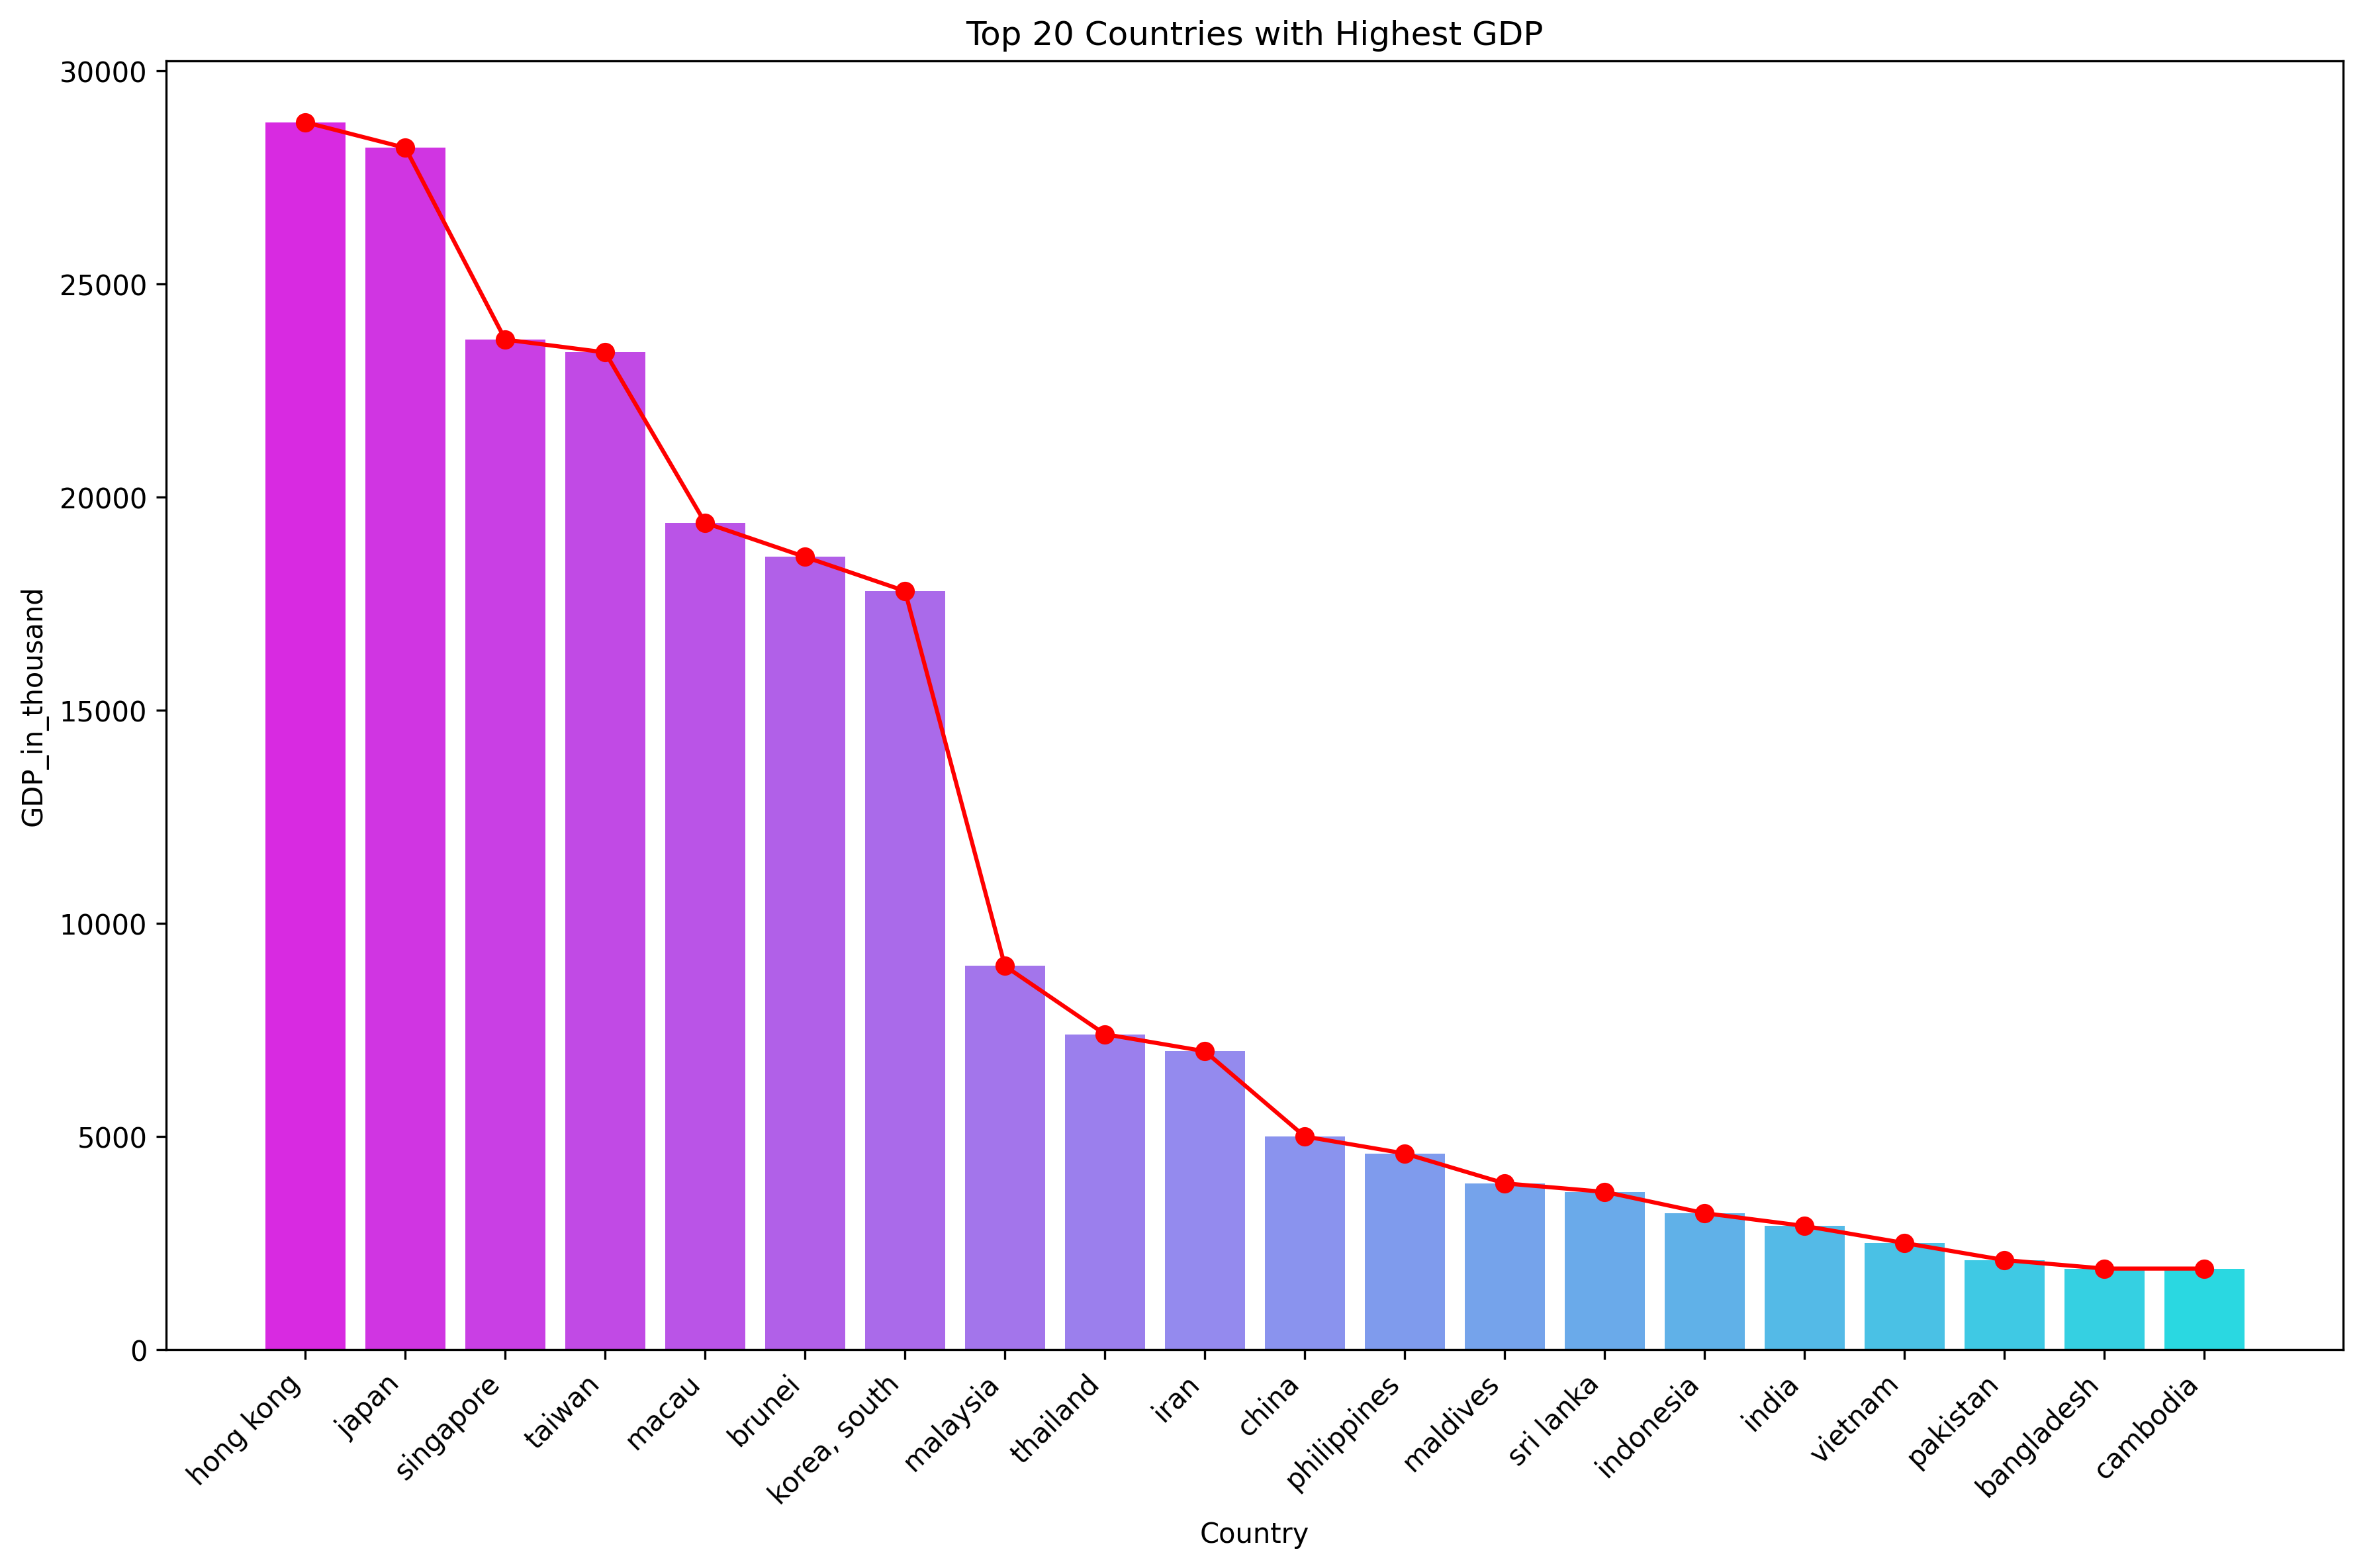

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by GDP_in_thousand column in descending order and get the top 20 rows
top_gdp_countries = dataset2.sort_values(by='GDP_in_thousand', ascending=False).head(20)

# Increase the figure size and DPI
plt.figure(figsize=(12, 8), dpi=300)

# Create a bar plot to visualize GDP for top countries
sns.barplot(data=top_gdp_countries, x='Country', y='GDP_in_thousand', palette='cool_r')
plt.title('Top 20 Countries with Highest GDP')
plt.xlabel('Country')
plt.ylabel('GDP_in_thousand')
plt.xticks(rotation=45, ha='right')

# Add a line connecting the birth rate and death rate values
plt.plot(top_gdp_countries.head(20)["Country"], top_gdp_countries.head(20)["GDP_in_thousand"], marker='o', linestyle='-', color='r')
plt.tight_layout()
plt.show()

In [23]:
dataset6=dataset2[dataset2['Country'].isin(['cambodia','vietnam','thailand','singapore','laos','brunei','indonesia','philippines','malaysia','burma','east timor'])]

In [24]:
dataset6

,Country,Region,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
29,brunei,ASIA (EX. NEAR EAST),379444,359.0,18600.0,939.0,57.0,76.0,3.0,1879.0,345.0,36.0,561.0,403.0
32,burma,ASIA (EX. NEAR EAST),47382633,-18.0,1800.0,853.0,1519.0,97.0,3.0,1791.0,983.0,564.0,82.0,353.0
34,cambodia,ASIA (EX. NEAR EAST),13881427,0.0,1900.0,694.0,2096.0,61.0,3.0,269.0,906.0,35.0,3.0,35.0
58,east timor,ASIA (EX. NEAR EAST),1062777,0.0,500.0,586.0,471.0,67.0,3.0,2699.0,624.0,85.0,231.0,684.0
95,indonesia,ASIA (EX. NEAR EAST),245452739,0.0,3200.0,879.0,1132.0,723.0,3.0,2034.0,625.0,134.0,458.0,408.0
113,laos,ASIA (EX. NEAR EAST),6368481,0.0,1700.0,664.0,38.0,35.0,3.0,3549.0,1155.0,455.0,287.0,258.0
126,malaysia,ASIA (EX. NEAR EAST),24385858,0.0,9000.0,887.0,548.0,1761.0,3.0,2286.0,505.0,84.0,48.0,436.0
162,philippines,ASIA (EX. NEAR EAST),89468677,-15.0,4600.0,926.0,1895.0,1677.0,3.0,2489.0,541.0,144.0,326.0,53.0
184,singapore,ASIA (EX. NEAR EAST),4492150,1153.0,23700.0,925.0,164.0,0.0,3.0,934.0,428.0,0.0,339.0,661.0
201,thailand,ASIA (EX. NEAR EAST),64631595,0.0,7400.0,926.0,2936.0,646.0,3.0,1387.0,704.0,99.0,441.0,46.0


In [25]:
dataset6.dtypes

Country                object
Region                 object
Population              int64
Net_migration         float64
GDP_in_thousand       float64
Literacy              float64
Arable_Percentage     float64
Crops_Percentage      float64
Climate               float64
Birthrate             float64
Deathrate             float64
Agriculture           float64
Industry              float64
Service               float64
dtype: object

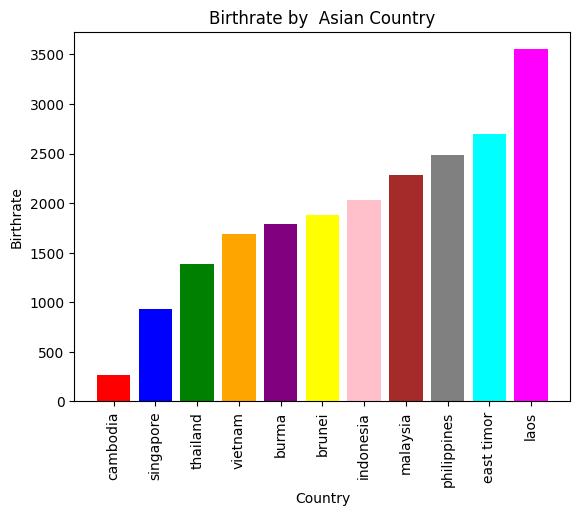

In [26]:
import matplotlib.pyplot as plt

dataset7 = dataset6 # Your dataset
sorted_df = dataset7.sort_values(by='Birthrate', ascending=True)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan', 'magenta']
plt.bar(data=sorted_df.head(11), x="Country", height="Birthrate", width=0.8,color=colors)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('Country')
plt.ylabel('Birthrate')
plt.title('Birthrate by  Asian Country')

plt.show()

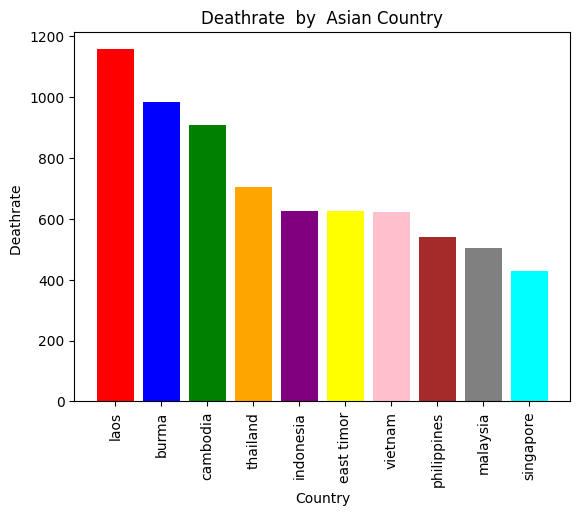

In [27]:
import matplotlib.pyplot as plt
#sorted_df = dataset.sort_values(by='Population', ascending=True)

#descending order ( big to small)
sorted_df = dataset7.sort_values(by='Deathrate', ascending=False)
dataset7 = dataset6 # Your dataset
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan', 'magenta']
plt.bar(data=sorted_df.head(10), x="Country", height="Deathrate", width=0.8,color=colors,)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('Country')
plt.ylabel('Deathrate ')
plt.title('Deathrate  by  Asian Country')

plt.show()

## Population in Asia Countries

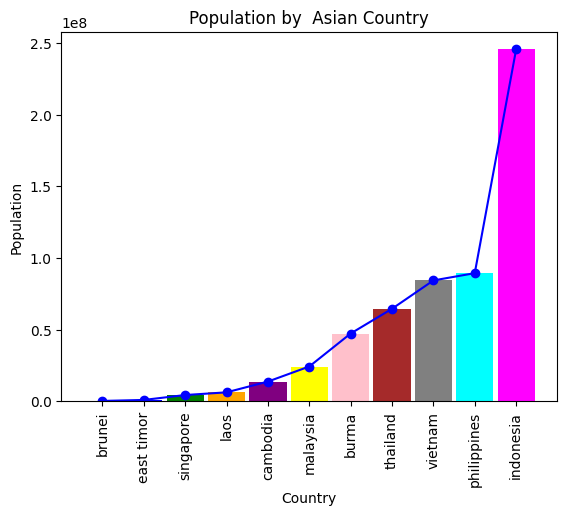

In [28]:
import matplotlib.pyplot as plt

dataset7 = dataset6 # Your dataset
sorted_df = dataset7.sort_values(by='Population', ascending=True)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan', 'magenta']
plt.bar(data=sorted_df.head(11), x="Country", height="Population", width=0.9,color=colors)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Population by  Asian Country')

# Add a line connecting the Population values
plt.plot(sorted_df.head(11)["Country"], sorted_df.head(11)["Population"], marker='o', linestyle='-', color='blue')


plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

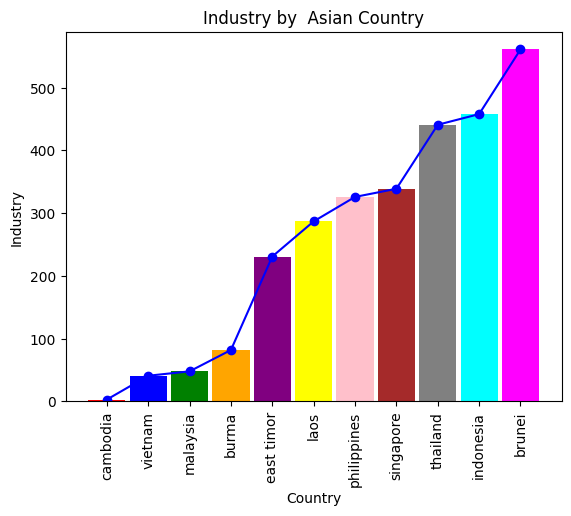

In [29]:
import matplotlib.pyplot as plt

dataset7 = dataset6 # Your dataset

sorted_df = dataset7.sort_values(by='Industry', ascending=True)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan', 'magenta']
plt.bar(data=sorted_df.head(11), x="Country", height="Industry", width=0.9,color=colors)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('Country')
plt.ylabel('Industry')
plt.title('Industry by  Asian Country')

# Add a line connecting the Industry values
plt.plot(sorted_df.head(11)["Country"], sorted_df.head(11)["Industry"], marker='o', linestyle='-', color='blue')

plt.show

## Create Pie Chart

In [30]:
#dataset5= pd.read_csv('D:\Lessson_Master_ITC\EDA\Assignment\Global\GDP_Predict.csv')
# Strip extra spaces from the 'Region' values and filter the DataFrame
dataset2 = dataset[dataset['Region'].str.strip() == "ASIA (EX. NEAR EAST)"]
dataset2.Country = dataset2.Country.str.strip().str.lower()

print(dataset2.Country.unique())

dataset2[dataset2['Country'].isin(['cambodia','vietnam','thailand','laos','malaysia','pakistan','sri lanka'])]

['afghanistan' 'bangladesh' 'bhutan' 'brunei' 'burma' 'cambodia' 'china'
 'east timor' 'hong kong' 'india' 'indonesia' 'iran' 'japan'
 'korea, north' 'korea, south' 'laos' 'macau' 'malaysia' 'maldives'
 'mongolia' 'nepal' 'pakistan' 'philippines' 'singapore' 'sri lanka'
 'taiwan' 'thailand' 'vietnam']


C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\2892374995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.Country = dataset2.Country.str.strip().str.lower()


,Country,Region,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
34,cambodia,ASIA (EX. NEAR EAST),13881427,0.0,1900.0,694.0,2096.0,61.0,3.0,269.0,906.0,35.0,3.0,35.0
113,laos,ASIA (EX. NEAR EAST),6368481,0.0,1700.0,664.0,38.0,35.0,3.0,3549.0,1155.0,455.0,287.0,258.0
126,malaysia,ASIA (EX. NEAR EAST),24385858,0.0,9000.0,887.0,548.0,1761.0,3.0,2286.0,505.0,84.0,48.0,436.0
156,pakistan,ASIA (EX. NEAR EAST),165803560,-277.0,2100.0,457.0,2787.0,87.0,1.0,2974.0,823.0,216.0,251.0,533.0
191,sri lanka,ASIA (EX. NEAR EAST),20222240,-131.0,3700.0,923.0,1386.0,157.0,3.0,1551.0,652.0,178.0,276.0,545.0
201,thailand,ASIA (EX. NEAR EAST),64631595,0.0,7400.0,926.0,2936.0,646.0,3.0,1387.0,704.0,99.0,441.0,46.0
219,vietnam,ASIA (EX. NEAR EAST),84402966,-45.0,2500.0,903.0,1997.0,595.0,3.0,1686.0,622.0,209.0,41.0,381.0


In [31]:
dataset8=dataset2[dataset2['Country'].isin(['cambodia','vietnam','thailand','laos','malaysia','pakistan','sri lanka'])]

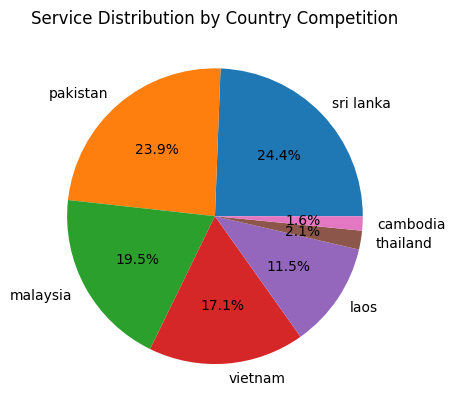

In [32]:
import matplotlib.pyplot as plt

dataset9 = dataset8  # Replace "dataset8" with your actual dataset variable or data frame

# Sort the dataset in descending order based on the "Service" column
sorted_df = dataset9.sort_values(by='Service', ascending=False)

# Extract the population values and country labels
Service = sorted_df['Service'].head(7)
countries = sorted_df['Country'].head(7)

plt.pie(Service, labels=countries, autopct='%1.1f%%')
plt.title('Service Distribution by Country Competition')

plt.show()

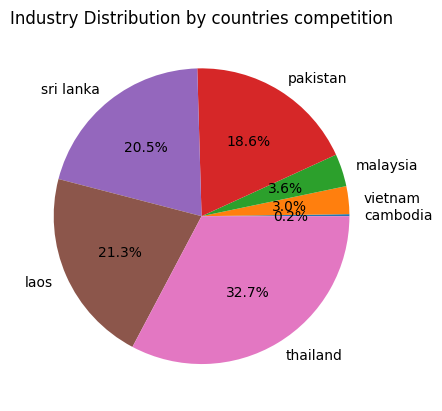

In [33]:
import matplotlib.pyplot as plt

dataset9 = dataset8  # Replace "dataset6" with your actual dataset variable or data frame

sorted_df = dataset9.sort_values(by='Industry', ascending=True)
# Extract the population values and country labels
Industry = sorted_df['Industry'].head(7)
countries = sorted_df['Country'].head(7)

plt.pie(Industry, labels=countries, autopct='%1.1f%%')
plt.title('Industry Distribution by countries competition')

plt.show()

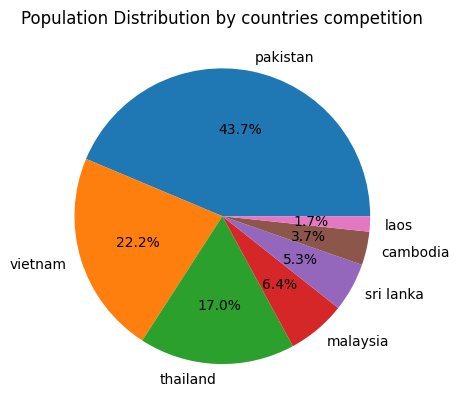

In [34]:
import matplotlib.pyplot as plt

dataset9 = dataset8  # Replace "dataset6" with your actual dataset variable or data frame

sorted_df = dataset9.sort_values(by='Population', ascending=False)
# Extract the population values and country labels
population = sorted_df['Population'].head(7)
countries = sorted_df['Country'].head(7)

plt.pie(population, labels=countries, autopct='%1.1f%%')
plt.title('Population Distribution by countries competition')

plt.show()

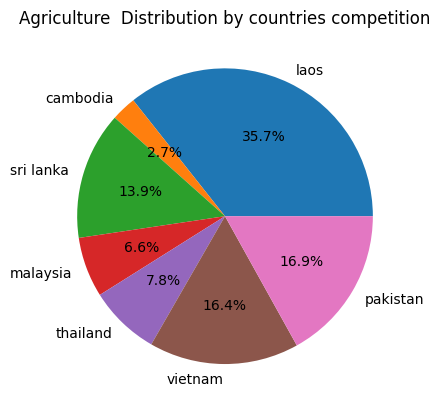

In [35]:
import matplotlib.pyplot as plt

dataset9 = dataset8  # Replace "dataset6" with your actual dataset variable or data frame

sorted_df = dataset9.sort_values(by='Population', ascending=True)
# Extract the population values and country labels
population = sorted_df['Agriculture'].head(7)
countries = sorted_df['Country'].head(7)

plt.pie(population, labels=countries, autopct='%1.1f%%')
plt.title('Agriculture  Distribution by countries competition')

plt.show()

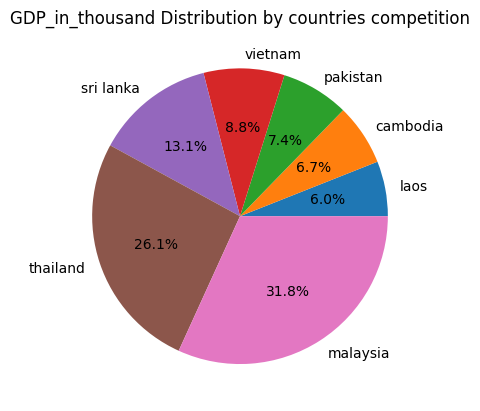

In [36]:
import matplotlib.pyplot as plt

dataset9 = dataset8  # Replace "dataset6" with your actual dataset variable or data frame
sorted_df = dataset9.sort_values(by='GDP_in_thousand', ascending=True)
# Extract the population values and country labels
GDP_in_thousand = sorted_df['GDP_in_thousand'].head(7)
countries = sorted_df['Country'].head(7)

plt.pie(GDP_in_thousand, labels=countries, autopct='%1.1f%%')
plt.title('GDP_in_thousand Distribution by countries competition')

plt.show()

# Data prepoccessing 

#   Find and Filling missing values

In [37]:
### Looking at the missing values in the dataset

dataset.isnull().sum().sort_values(ascending = False)

Climate               22
Literacy              18
Industry              16
Agriculture           15
Service               15
Deathrate              4
Net_migration          3
Birthrate              3
Arable_Percentage      2
Crops_Percentage       2
GDP_in_thousand        1
Country                0
Region                 0
Population             0
dtype: int64

## Replace missing value by median and mode

In [38]:
# List of columns with missing values
columns_with_missing = dataset.columns[dataset.isnull().any()]

 #Impute numerical columns with median base on our dataset is skewness
numerical_columns = dataset.select_dtypes(include=['float64'])
numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
dataset[numerical_columns] = dataset[numerical_columns].fillna(dataset[numerical_columns].median())

# Verify if all missing values are handled
missing_counts = dataset.isnull().sum()
print(missing_counts)

Country               0
Region                0
Population            0
Net_migration         0
GDP_in_thousand       0
Literacy              0
Arable_Percentage     0
Crops_Percentage      0
Climate               0
Birthrate             0
Deathrate             0
Agriculture           0
Industry              0
Service               0
dtype: int64


# 4.1 Detect and remove outliers in numerical variables

## Check outliers before Capping 

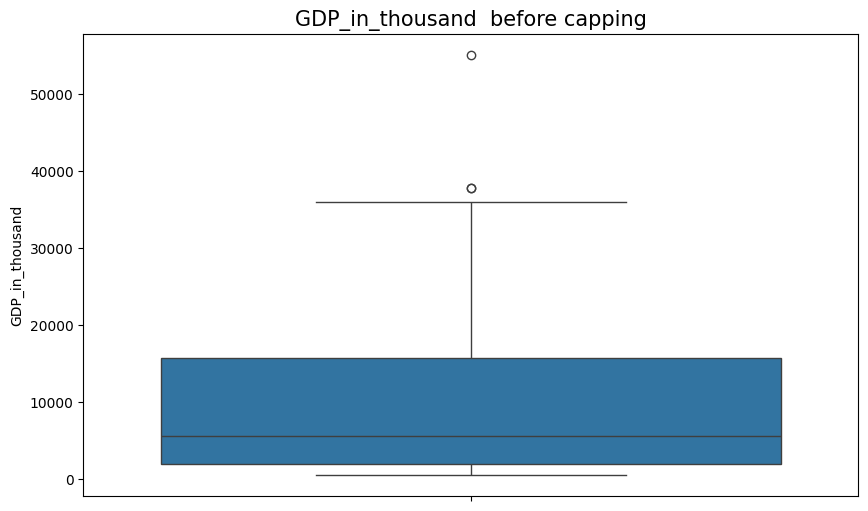

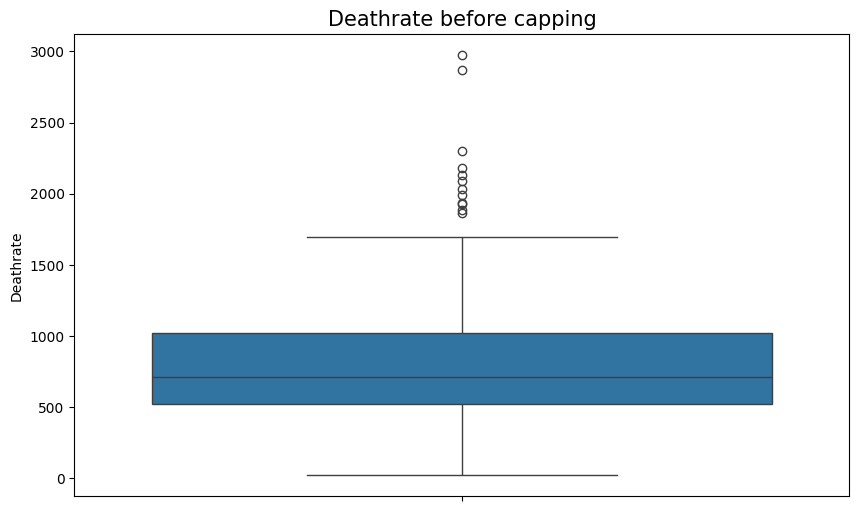

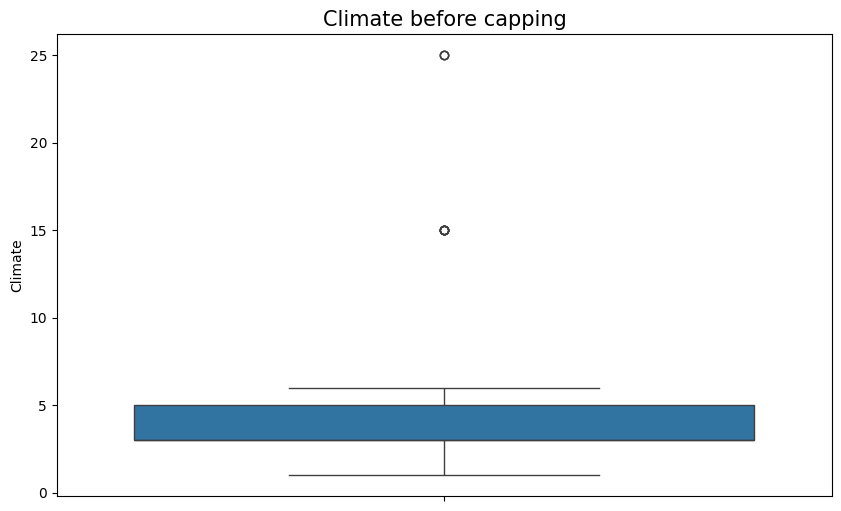

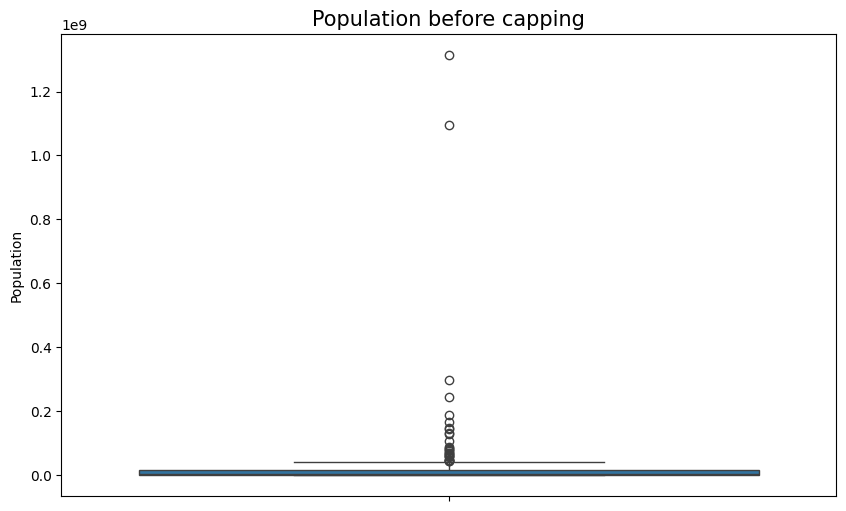

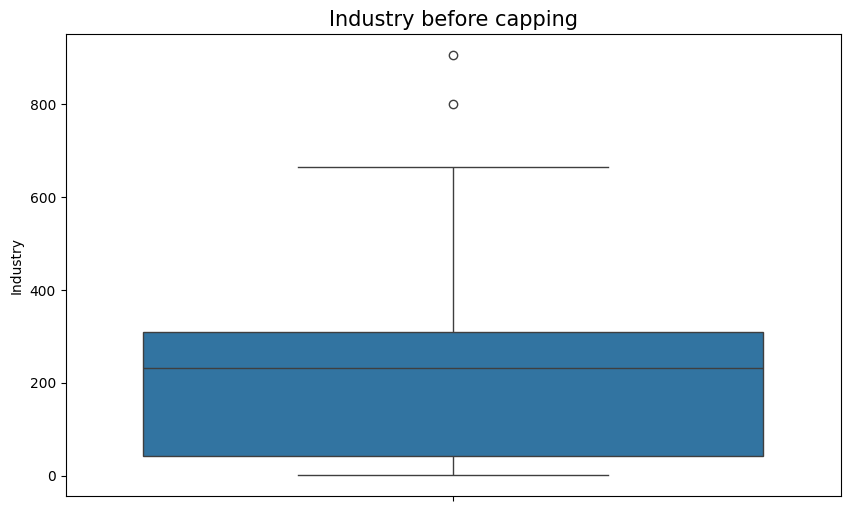

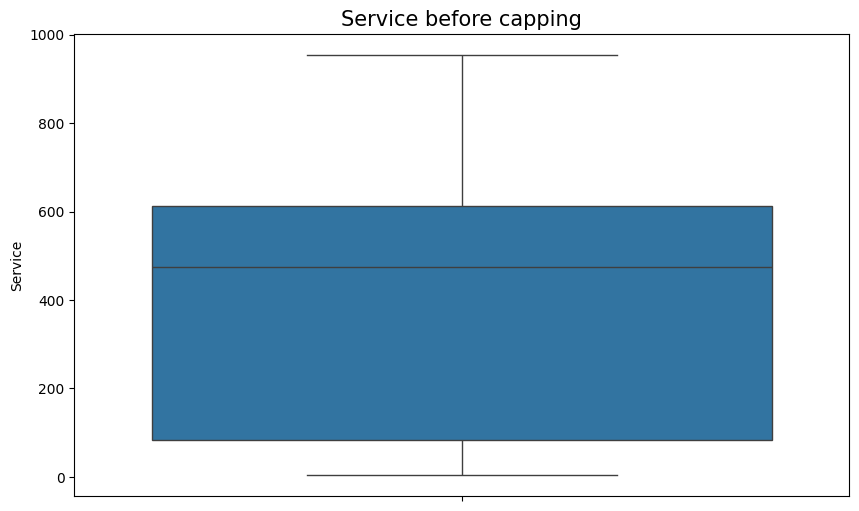

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(dataset["GDP_in_thousand"])
plt.title("GDP_in_thousand  before capping", size=15)
plt.show()

#plt.figure(figsize=(10,6))
#sns.boxplot(dataset["Net_migration"])
#plt.title("Net_migration before capping", size=15)
#plt.show()

#plt.figure(figsize=(10,6))
#sns.boxplot(dataset["Literacy"])
#plt.title("Literacy before capping", size=15)
#plt.show()

#plt.figure(figsize=(10,6))
#sns.boxplot(dataset["Crops_Percentage"])
#plt.title("Crops_Percentage  before capping", size=15)
#plt.show()



#plt.figure(figsize=(10,6))
#sns.boxplot(dataset["Birthrate"])
#plt.title("Birthrate  before capping", size=15)
#plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Deathrate"])
plt.title("Deathrate before capping", size=15)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Climate"])
plt.title("Climate before capping", size=15)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Population"])
plt.title("Population before capping", size=15)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Industry"])
plt.title("Industry before capping", size=15)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Service"])
plt.title("Service before capping", size=15)
plt.show()

#plt.figure(figsize=(10,6))
#sns.boxplot(dataset["Arable_Percentage"])
#plt.title("Arable_Percentage before capping", size=15)
#plt.show()

In [40]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [41]:
lowerprice, upperprice = remove_outlier(dataset["GDP_in_thousand"])
dataset["GDP_in_thousand"] = np.where(dataset["GDP_in_thousand"]>upperprice, upperprice, dataset["GDP_in_thousand"])
dataset["GDP_in_thousand"] = np.where(dataset["GDP_in_thousand"]<lowerprice, lowerprice, dataset["GDP_in_thousand"])

lowerprice, upperprice = remove_outlier(dataset["Deathrate"])
dataset["Deathrate"] = np.where(dataset["Deathrate"]>upperprice, upperprice, dataset["Deathrate"])
dataset["Deathrate"] = np.where(dataset["Deathrate"]<lowerprice, lowerprice, dataset["Deathrate"])

lowerprice, upperprice = remove_outlier(dataset["Industry"])
dataset["Industry"] = np.where(dataset["Industry"]>upperprice, upperprice, dataset["Industry"])
dataset["Industry"] = np.where(dataset["Industry"]<lowerprice, lowerprice, dataset["Industry"])


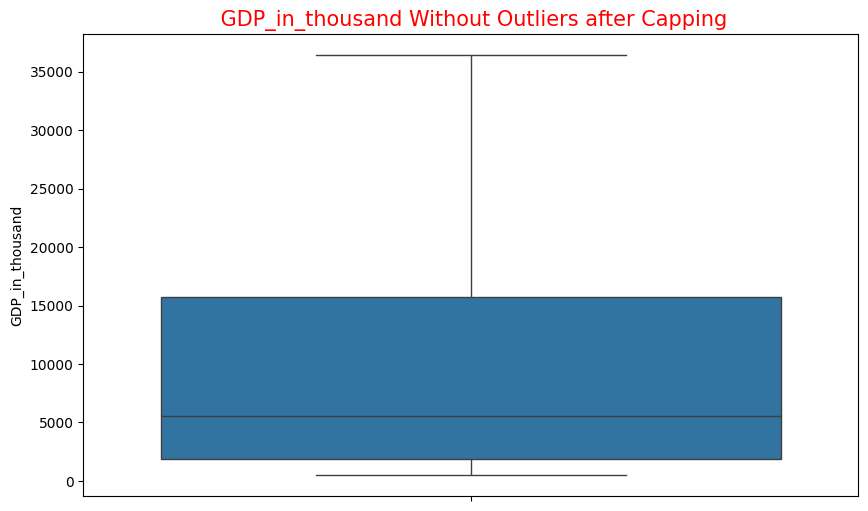

Text(0.5, 1.0, ' Industry Without Outliers after Capping')

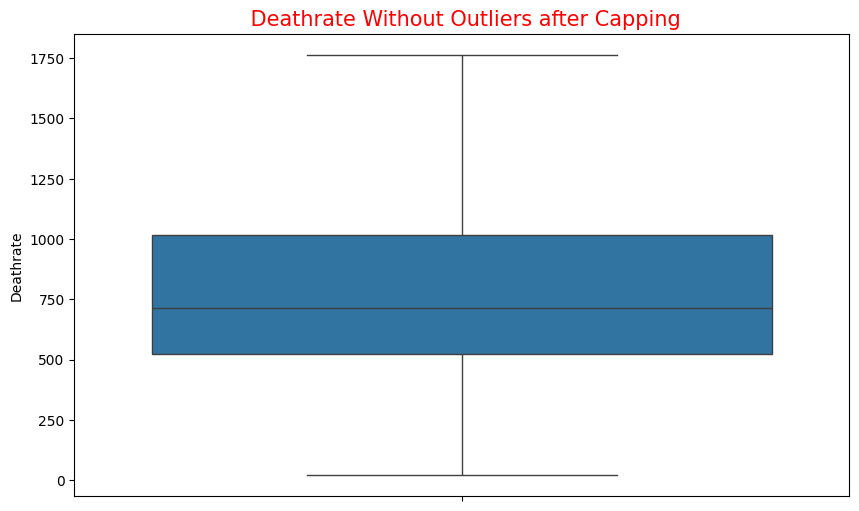

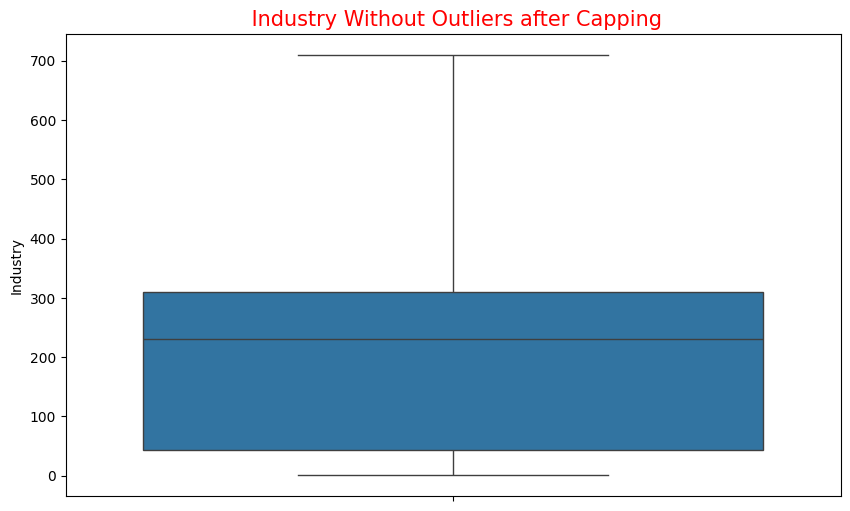

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(dataset["GDP_in_thousand"])
plt.title(" GDP_in_thousand Without Outliers after Capping", size=15,color="r")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Deathrate"])
plt.title(" Deathrate Without Outliers after Capping", size=15,color="r")

plt.figure(figsize=(10,6))
sns.boxplot(dataset["Industry"])
plt.title(" Industry Without Outliers after Capping", size=15,color="r")

# Top Population Countries in the World 

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\1310242159.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_population_country, x='Population', y='Country', palette='gist_rainbow_r', saturation=0.99, ax=axes)
C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\1310242159.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['{:,}'.format(int(x)) for x in axes.get_xticks()], rotation = 40)


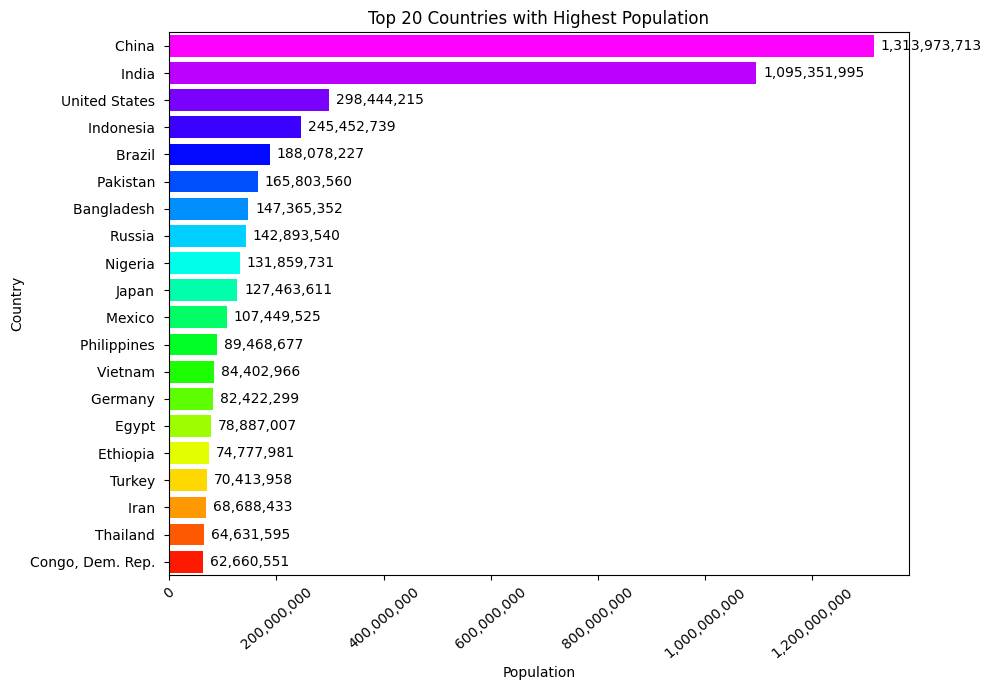

In [43]:
import matplotlib.ticker as ticker

sorted_df = dataset.sort_values(by='Population', ascending=False)

# Get the top 20 countries with the highest population
top_population_country = sorted_df.head(20)

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot for top population countries
sns.barplot(data=top_population_country, x='Population', y='Country', palette='gist_rainbow_r', saturation=0.99, ax=axes)
axes.set_title('Top 20 Countries with Highest Population')
axes.set_xlabel('Population')
axes.set_ylabel('Country')
axes.set_xticklabels(['{:,}'.format(int(x)) for x in axes.get_xticks()], rotation = 40)
for p in axes.patches:
    axes.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\3391293573.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_population_country, x='Population', y='Country', palette='gist_rainbow_r', saturation=0.99, ax=axes)
C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\3391293573.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['{:,}'.format(int(x)) for x in axes.get_xticks()], rotation = 40)


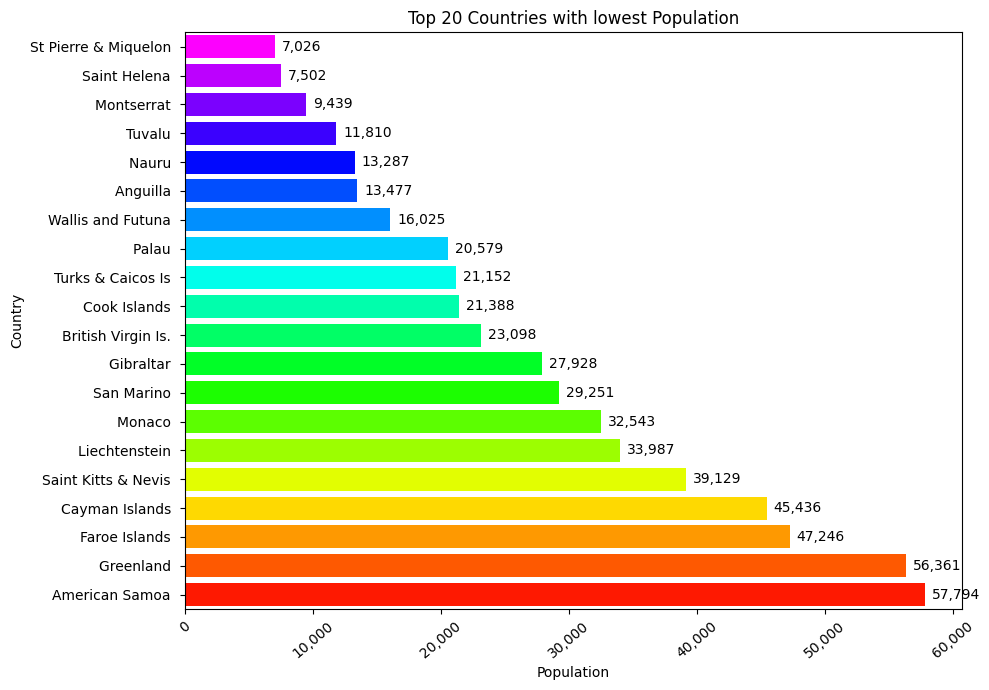

In [44]:
import matplotlib.ticker as ticker

sorted_df = dataset.sort_values(by='Population', ascending=True)

# Get the top 20 countries with the highest population
top_population_country = sorted_df.head(20)

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot for top population countries
sns.barplot(data=top_population_country, x='Population', y='Country', palette='gist_rainbow_r', saturation=0.99, ax=axes)
axes.set_title('Top 20 Countries with lowest Population')
axes.set_xlabel('Population')
axes.set_ylabel('Country')
axes.set_xticklabels(['{:,}'.format(int(x)) for x in axes.get_xticks()], rotation = 40)
for p in axes.patches:
    axes.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [45]:
#sns.barplot(data=dataset.head(10),x='Country', y='Deathrate')

In [46]:
dataset.head(10)

,Country,Region,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,2306.0,700.0,360.0,1213.0,22.0,1.0,466.0,1762.5,38.0,24.0,38.0
1,Albania,EASTERN EUROPE,3581655,-493.0,4500.0,865.0,2109.0,442.0,5.0,1511.0,522.0,232.0,188.0,579.0
2,Algeria,NORTHERN AFRICA,32930091,-39.0,6000.0,700.0,322.0,25.0,1.0,1714.0,461.0,101.0,6.0,298.0
3,American Samoa,OCEANIA,57794,-2071.0,8000.0,970.0,10.0,15.0,3.0,2246.0,327.0,55.0,231.0,475.5
4,Andorra,WESTERN EUROPE,71201,66.0,19000.0,1000.0,222.0,0.0,5.0,871.0,625.0,55.0,231.0,475.5
5,Angola,SUB-SAHARAN AFRICA,12127071,0.0,1900.0,420.0,241.0,24.0,3.0,4511.0,242.0,96.0,658.0,246.0
6,Anguilla,LATIN AMER. & CARIB,13477,1076.0,8600.0,950.0,0.0,0.0,3.0,1417.0,534.0,4.0,18.0,78.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,-615.0,11000.0,890.0,1818.0,455.0,3.0,1693.0,537.0,38.0,22.0,743.0
8,Argentina,LATIN AMER. & CARIB,39921833,61.0,11200.0,971.0,1231.0,48.0,5.0,1673.0,755.0,95.0,358.0,547.0
9,Armenia,C.W. OF IND. STATES,2976372,-647.0,3500.0,986.0,1755.0,23.0,6.0,1207.0,823.0,239.0,343.0,418.0


# 4.3 Feature Engineering

# 4.3.1 New Manufacturer - using the column Manufacturer

#  Data Transformation

## Transforming from skew to approximately normal distribution -Sales_in_thousands

In [47]:
dataset.head(1)

,Country,Region,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,2306.0,700.0,360.0,1213.0,22.0,1.0,466.0,1762.5,38.0,24.0,38.0


## transform skewness population to approachximate normal distribution 

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\3714885403.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Population'], label = 'Skewness: %.2f'%(dataset['Population'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Population')

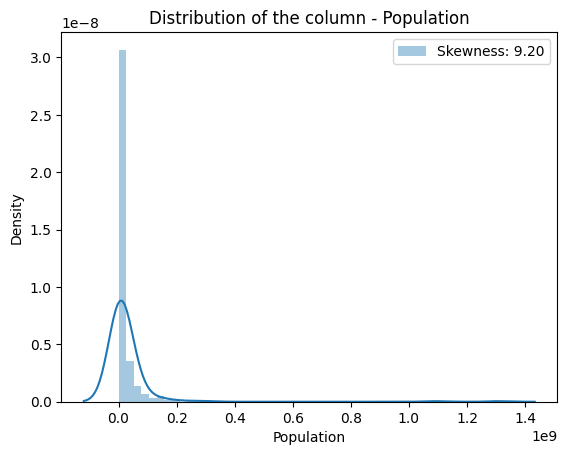

In [48]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(dataset['Population'], label = 'Skewness: %.2f'%(dataset['Population'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Population')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\2333210283.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Population'], label = 'Skewness: %.2f'%(dataset['Population'].skew()))


Text(0.5, 1.0, 'Distribution after transform -Population')

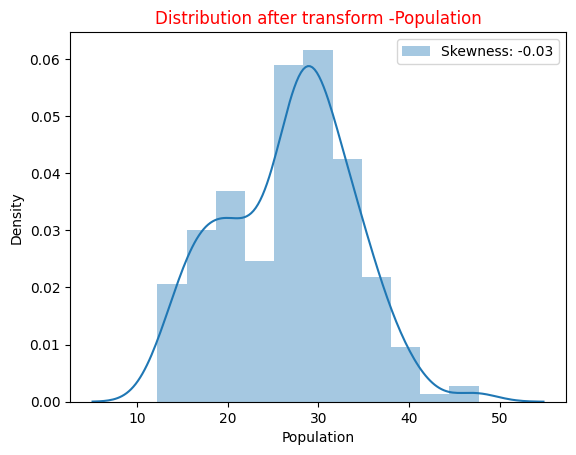

In [49]:
### Understanding the distribution of the data approximately normal distribution Sales_in_thousands
sales_data = [1 if value == 0 else value for value in dataset['Population']]

modified_sales, _ = stats.boxcox(sales_data)
dataset['Population'] = modified_sales

sns.distplot(dataset['Population'], label = 'Skewness: %.2f'%(dataset['Population'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution after transform -Population', color='r')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\1578503762.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Net_migration'], label = 'Skewness: %.2f'%(dataset['Net_migration'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Net_migration')

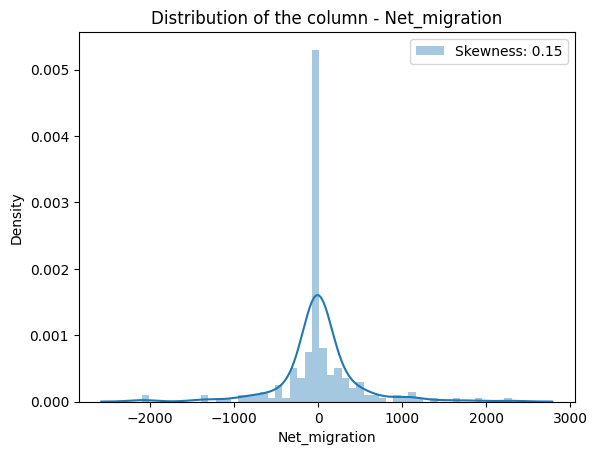

In [50]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(dataset['Net_migration'], label = 'Skewness: %.2f'%(dataset['Net_migration'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Net_migration')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\2230653259.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['GDP_in_thousand'], label = 'Skewness: %.2f'%(dataset['GDP_in_thousand'].skew()))


Text(0.5, 1.0, 'Distribution of the column - GDP_in_thousand')

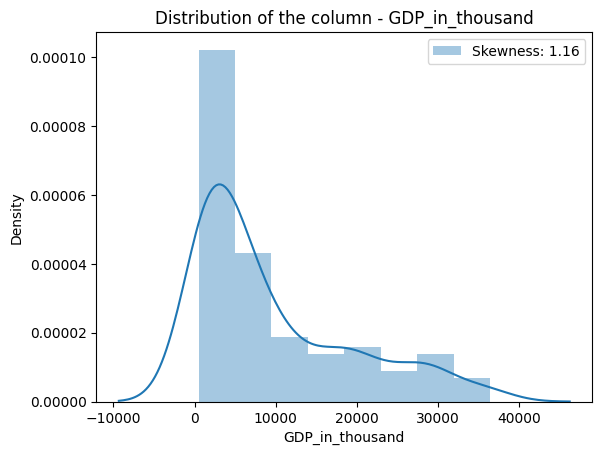

In [51]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(dataset['GDP_in_thousand'], label = 'Skewness: %.2f'%(dataset['GDP_in_thousand'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - GDP_in_thousand')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\2046696658.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['GDP_in_thousand'], label = 'Skewness: %.2f'%(dataset['GDP_in_thousand'].skew()))


Text(0.5, 1.0, 'Distribution after transform -GDP_in_thousand')

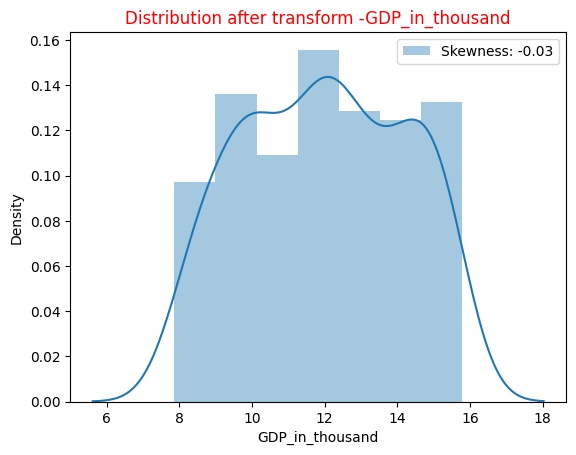

In [52]:
### Understanding the distribution of the data approximately normal distribution GDP_in_thousand
sales_data = [1 if value == 0 else value for value in dataset['GDP_in_thousand']]

modified_sales, _ = stats.boxcox(sales_data)
dataset['GDP_in_thousand'] = modified_sales

sns.distplot(dataset['GDP_in_thousand'], label = 'Skewness: %.2f'%(dataset['GDP_in_thousand'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution after transform -GDP_in_thousand', color='r')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\1081555388.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Literacy'], label = 'Skewness: %.2f'%(dataset['Literacy'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Literacy')

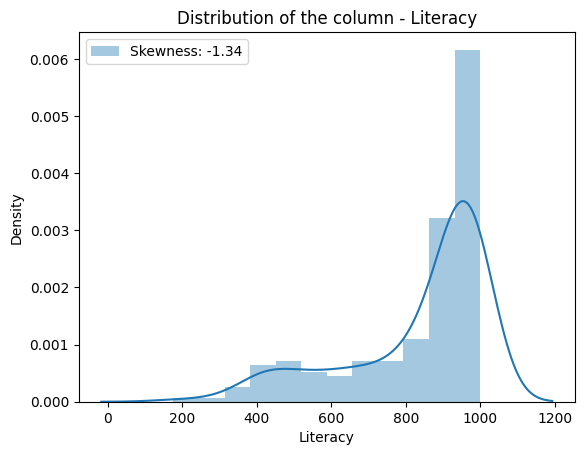

In [53]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(dataset['Literacy'], label = 'Skewness: %.2f'%(dataset['Literacy'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Literacy')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\1990205900.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Literacy'], label = 'Skewness: %.2f'%(dataset['Literacy'].skew()))


Text(0.5, 1.0, 'Distribution after transform -Literacy')

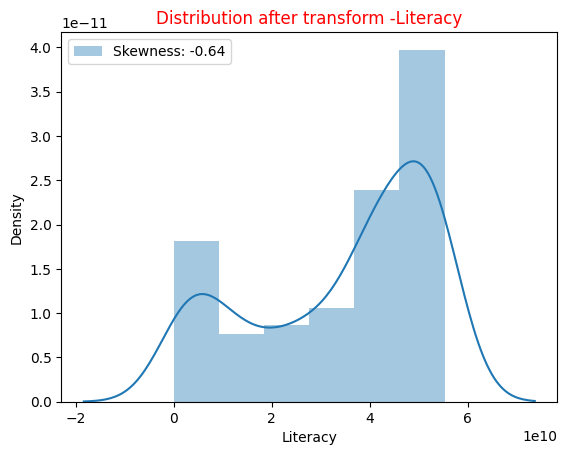

In [54]:
### Understanding the distribution of the data approximately normal distribution GDP_in_thousand
sales_data = [1 if value == 0 else value for value in dataset['Literacy']]

modified_sales, _ = stats.boxcox(sales_data)
dataset['Literacy'] = modified_sales

sns.distplot(dataset['Literacy'], label = 'Skewness: %.2f'%(dataset['Literacy'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution after transform -Literacy', color='r')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\259439971.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Crops_Percentage'], label = 'Skewness: %.2f'%(dataset['Crops_Percentage'].skew()))


Text(0.5, 1.0, 'Distribution of the column - Crops_Percentage')

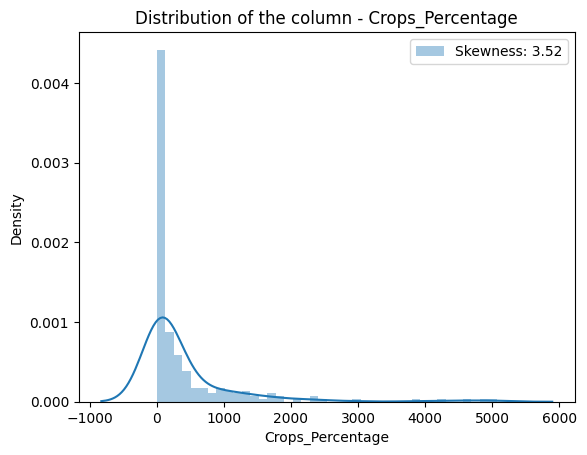

In [55]:
### the distribution of the column - Crops_Percentage

sns.distplot(dataset['Crops_Percentage'], label = 'Skewness: %.2f'%(dataset['Crops_Percentage'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Crops_Percentage')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\632465121.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Crops_Percentage'], label = 'Skewness: %.2f'%(dataset['Crops_Percentage'].skew()))


Text(0.5, 1.0, 'Distribution after transform -Crops_Percentage')

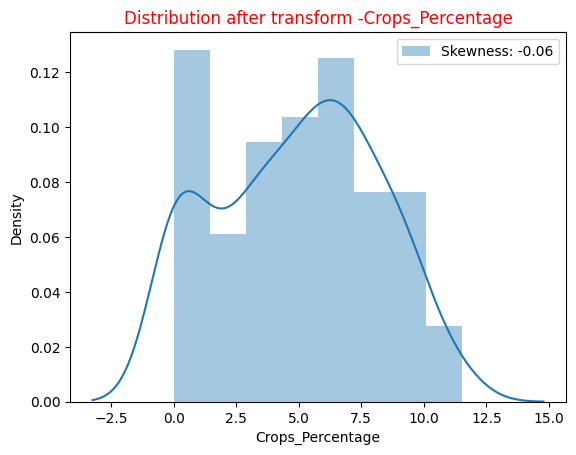

In [56]:
###  the distribution of the data approximately normal distribution Crops_Percentage
sales_data = [1 if value == 0 else value for value in dataset['Crops_Percentage']]

modified_sales, _ = stats.boxcox(sales_data)
dataset['Crops_Percentage'] = modified_sales

sns.distplot(dataset['Crops_Percentage'], label = 'Skewness: %.2f'%(dataset['Crops_Percentage'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution after transform -Crops_Percentage', color='r')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\474520845.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Birthrate'], label = 'Skewness: %.2f'%(dataset['Birthrate'].skew()))


Text(0.5, 1.0, 'Distribution of the column -Birthrate')

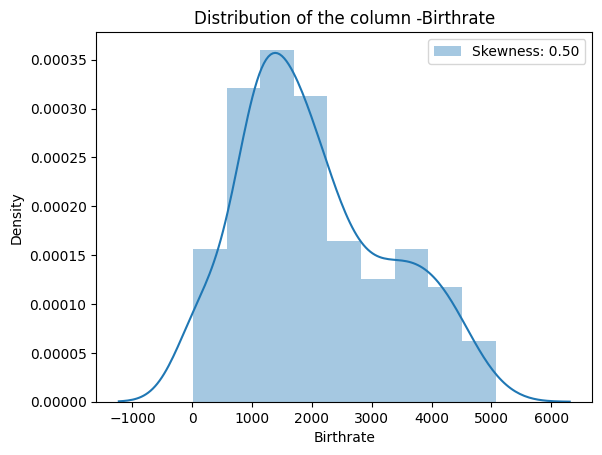

In [57]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(dataset['Birthrate'], label = 'Skewness: %.2f'%(dataset['Birthrate'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column -Birthrate')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\1499447781.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Birthrate'], label = 'Skewness: %.2f'%(dataset['Birthrate'].skew()))


Text(0.5, 1.0, 'Distribution after transform -Birthrate')

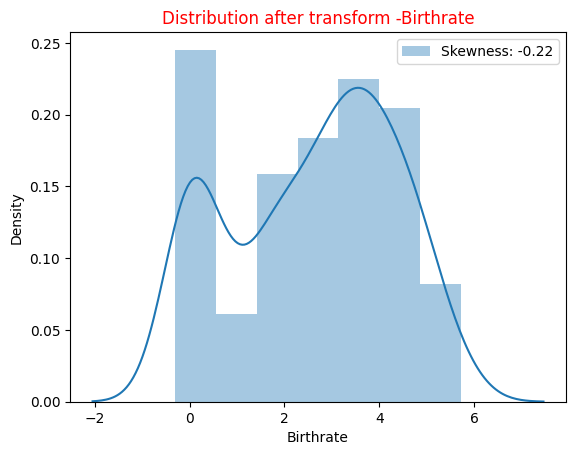

In [58]:
### Understanding the distribution of the data approximately normal distribution GDP_in_thousand
sales_data = [1 if value == 0 else value for value in dataset['Crops_Percentage']]

modified_sales, _ = stats.boxcox(sales_data)
dataset['Birthrate'] = modified_sales

sns.distplot(dataset['Birthrate'], label = 'Skewness: %.2f'%(dataset['Birthrate'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution after transform -Birthrate', color='r')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\3960711207.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Deathrate'], label = 'Skewness: %.2f'%(dataset['Deathrate'].skew()))


Text(0.5, 1.0, 'Distribution of the column -Deathrate')

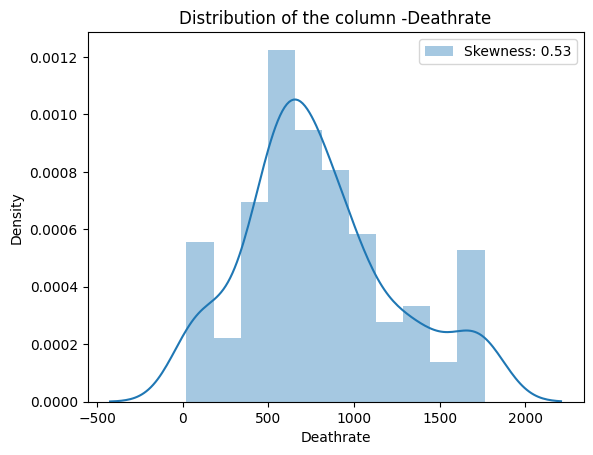

In [59]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(dataset['Deathrate'], label = 'Skewness: %.2f'%(dataset['Deathrate'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column -Deathrate')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\1170928345.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Deathrate'], label = 'Skewness: %.2f'%(dataset['Deathrate'].skew()))


Text(0.5, 1.0, 'Distribution after transform -Deathrate')

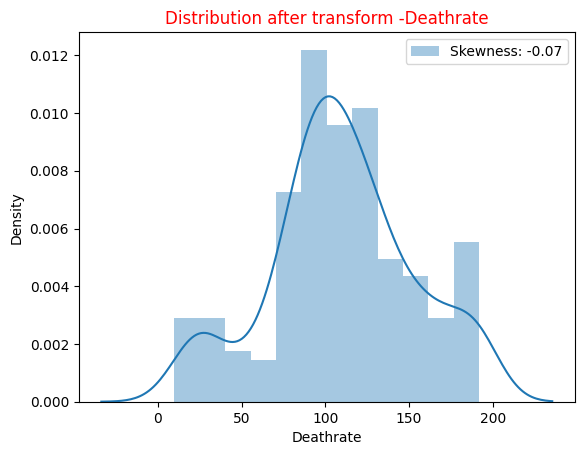

In [60]:
### Understanding the distribution of the data approximately normal distribution GDP_in_thousand
sales_data = [1 if value == 0 else value for value in dataset['Deathrate']]

modified_sales, _ = stats.boxcox(sales_data)
dataset['Deathrate'] = modified_sales

sns.distplot(dataset['Deathrate'], label = 'Skewness: %.2f'%(dataset['Deathrate'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution after transform -Deathrate', color='r')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\2399077445.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Industry'], label = 'Skewness: %.2f'%(dataset['Industry'].skew()))


Text(0.5, 1.0, 'Distribution of the column -Industry')

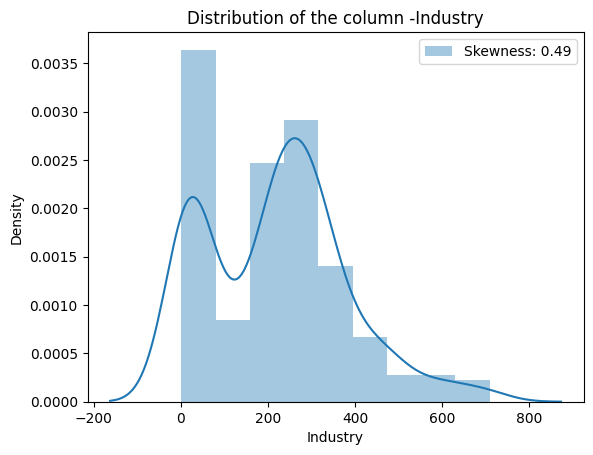

In [61]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(dataset['Industry'], label = 'Skewness: %.2f'%(dataset['Industry'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column -Industry')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\4094484922.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Industry'], label = 'Skewness: %.2f'%(dataset['Industry'].skew()))


Text(0.5, 1.0, 'Distribution after transform -Industry')

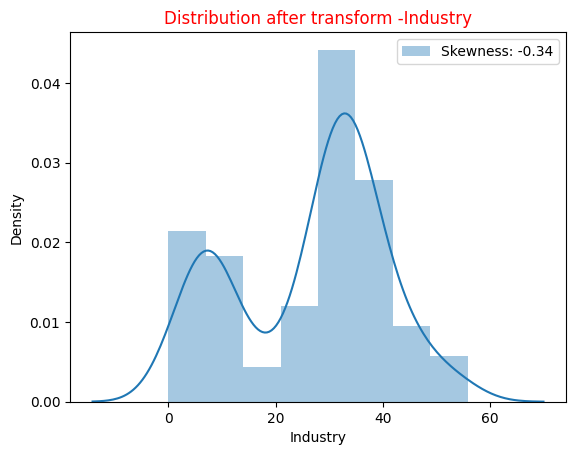

In [62]:
### Understanding the distribution of the data approximately normal distribution GDP_in_thousand
sales_data = [1 if value == 0 else value for value in dataset['Industry']]

modified_sales, _ = stats.boxcox(sales_data)
dataset['Industry'] = modified_sales

sns.distplot(dataset['Industry'], label = 'Skewness: %.2f'%(dataset['Industry'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution after transform -Industry', color='r')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\1832636579.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Service'], label = 'Skewness: %.2f'%(dataset['Service'].skew()))


Text(0.5, 1.0, 'Distribution of the column -Service')

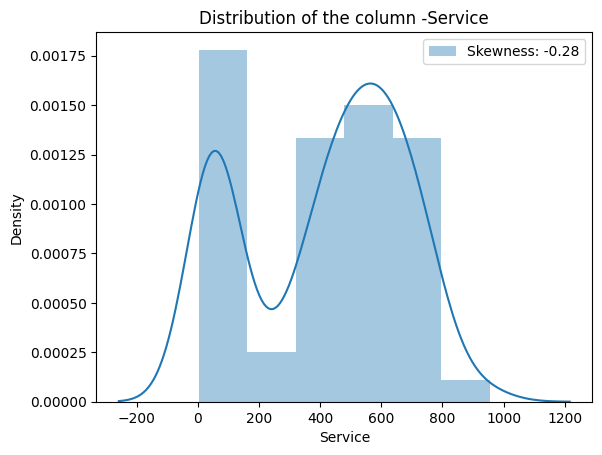

In [63]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(dataset['Service'], label = 'Skewness: %.2f'%(dataset['Service'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column -Service')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\2467327148.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Agriculture'], label = 'Skewness: %.2f'%(dataset['Agriculture'].skew()))


Text(0.5, 1.0, 'Distribution of the column -Agriculture')

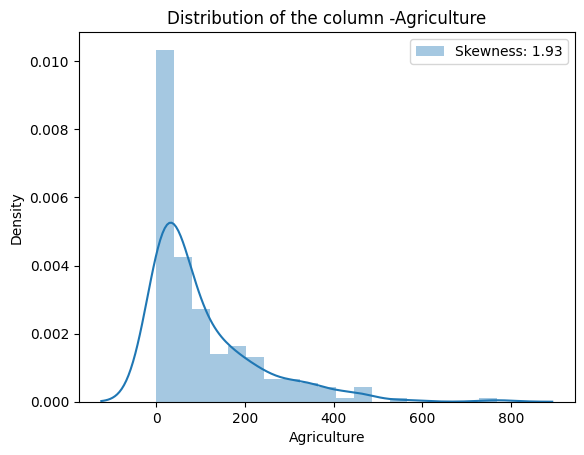

In [64]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(dataset['Agriculture'], label = 'Skewness: %.2f'%(dataset['Agriculture'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column -Agriculture')

C:\Users\vanna\AppData\Local\Temp\ipykernel_7960\2072814488.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Agriculture'], label = 'Skewness: %.2f'%(dataset['Agriculture'].skew()))


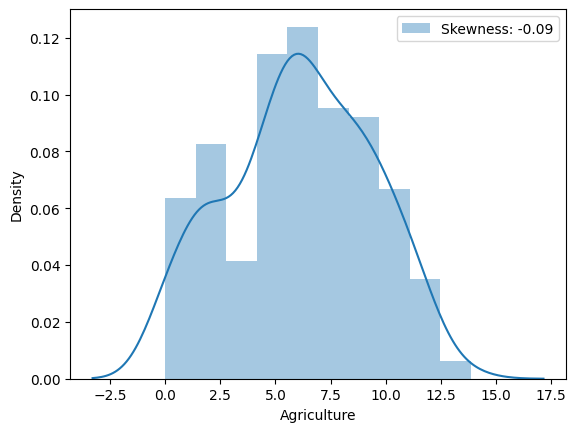

In [65]:
### Understanding the distribution of the data approximately normal distribution GDP_in_thousand
sales_data = [1 if value == 0 else value for value in dataset['Agriculture']]

modified_sales, _ = stats.boxcox(sales_data)
dataset['Agriculture'] = modified_sales

sns.distplot(dataset['Agriculture'], label = 'Skewness: %.2f'%(dataset['Agriculture'].skew()))
plt.legend(loc = 'best')

In [66]:
dataset.columns

Index(['Country', 'Region', 'Population', 'Net_migration', 'GDP_in_thousand',
       'Literacy', 'Arable_Percentage ', 'Crops_Percentage', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

## 4.5.2 Dropping unnecessary columns

In [67]:
dataset.head(1)

,Country,Region,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),33.409738,2306.0,8.397201,1.171036e+09,1213.0,3.43779,1.0,1.853667,191.944894,5.345427,8.077841,38.0


In [68]:
# Drop the original categorical columns

modified_data=dataset.drop(['Country'], axis=1)
modified_data=modified_data.drop(['Region'], axis=1)



In [69]:
modified_data

,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,33.409738,2306.0,8.397201,1.171036e+09,1213.0,3.437790,1.0,1.853667,191.944894,5.345427,8.077841,38.0
1,26.733638,-493.0,11.609986,3.199290e+10,2109.0,7.537226,5.0,4.023596,86.618055,9.849342,27.118960,579.0
2,33.605113,-39.0,12.146758,1.439575e+10,322.0,3.596020,1.0,1.951636,79.817287,7.576597,2.952123,298.0
3,16.463423,-2071.0,12.694907,4.929334e+10,10.0,2.971831,3.0,1.554638,63.628644,6.138605,30.387511,475.5
4,16.914786,66.0,14.414045,5.529684e+10,222.0,0.000000,5.0,0.000000,97.494526,6.138605,30.387511,475.5
...,...,...,...,...,...,...,...,...,...,...,...,...
222,25.672301,298.0,8.613525,4.120487e+10,169.0,9.848283,5.0,5.038529,71.726674,2.757960,8.909283,63.0
223,19.985392,0.0,12.000180,4.120487e+10,2.0,0.000000,1.0,0.000000,106.291241,6.138605,30.387511,4.0
224,32.194241,0.0,8.613525,4.105965e+09,278.0,3.545343,1.0,1.920441,25.332747,8.327094,44.852455,393.0
225,30.214592,0.0,8.613525,2.450698e+10,708.0,1.140446,3.0,0.136910,191.944894,4.275163,9.108006,489.0


# Feature Scaling

In [70]:
### A function to normalize numerical columns

def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
    
    dataframe[column] = new_data

numerical_columns = ['Population','Net_migration','GDP_in_thousand','Arable_Percentage ','Literacy', 'Crops_Percentage', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
                    'Industry', 'Service']
for each_column in numerical_columns:
    normalize_columns(modified_data, each_column)

In [71]:
modified_data

,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.597562,1.000000,0.067674,0.019782,0.195299,0.297878,0.000000,0.358435,1.000000,0.385539,0.144684,0.035789
1,0.408989,0.364586,0.473428,0.577966,0.339559,0.653087,0.166667,0.718067,0.421573,0.710384,0.485734,0.605263
2,0.603080,0.467650,0.541219,0.259282,0.051844,0.311589,0.000000,0.374672,0.384225,0.546462,0.052876,0.309474
3,0.118896,0.006356,0.610447,0.891277,0.001610,0.257504,0.083333,0.308875,0.295321,0.442747,0.544278,0.496316
4,0.131645,0.491487,0.827563,1.000000,0.035743,0.000000,0.166667,0.051218,0.481304,0.442747,0.544278,0.496316
...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.379010,0.544154,0.094994,0.744795,0.027210,0.853336,0.166667,0.886276,0.339794,0.198918,0.159576,0.062105
223,0.218378,0.476504,0.522707,0.744795,0.000322,0.000000,0.000000,0.051218,0.529613,0.442747,0.544278,0.000000
224,0.563229,0.476504,0.094994,0.072934,0.044759,0.307198,0.000000,0.369501,0.085011,0.600591,0.803363,0.409474
225,0.507312,0.476504,0.094994,0.442396,0.113991,0.098818,0.083333,0.073909,1.000000,0.308346,0.163136,0.510526


# 4.7 Feature Selection

In [72]:
#Check Datatypes (all features are numerical)
modified_data.head()

,Population,Net_migration,GDP_in_thousand,Literacy,Arable_Percentage,Crops_Percentage,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.597562,1.000000,0.067674,0.019782,0.195299,0.297878,0.000000,0.358435,1.000000,0.385539,0.144684,0.035789
1,0.408989,0.364586,0.473428,0.577966,0.339559,0.653087,0.166667,0.718067,0.421573,0.710384,0.485734,0.605263
2,0.603080,0.467650,0.541219,0.259282,0.051844,0.311589,0.000000,0.374672,0.384225,0.546462,0.052876,0.309474
3,0.118896,0.006356,0.610447,0.891277,0.001610,0.257504,0.083333,0.308875,0.295321,0.442747,0.544278,0.496316
4,0.131645,0.491487,0.827563,1.000000,0.035743,0.000000,0.166667,0.051218,0.481304,0.442747,0.544278,0.496316


In [73]:
cr =modified_data.corr()

cr['GDP_in_thousand']

Population           -0.177471
Net_migration         0.249064
GDP_in_thousand       1.000000
Literacy              0.657422
Arable_Percentage     0.007769
Crops_Percentage     -0.194835
Climate              -0.029632
Birthrate            -0.183978
Deathrate            -0.244711
Agriculture          -0.597206
Industry              0.067562
Service               0.305820
Name: GDP_in_thousand, dtype: float64

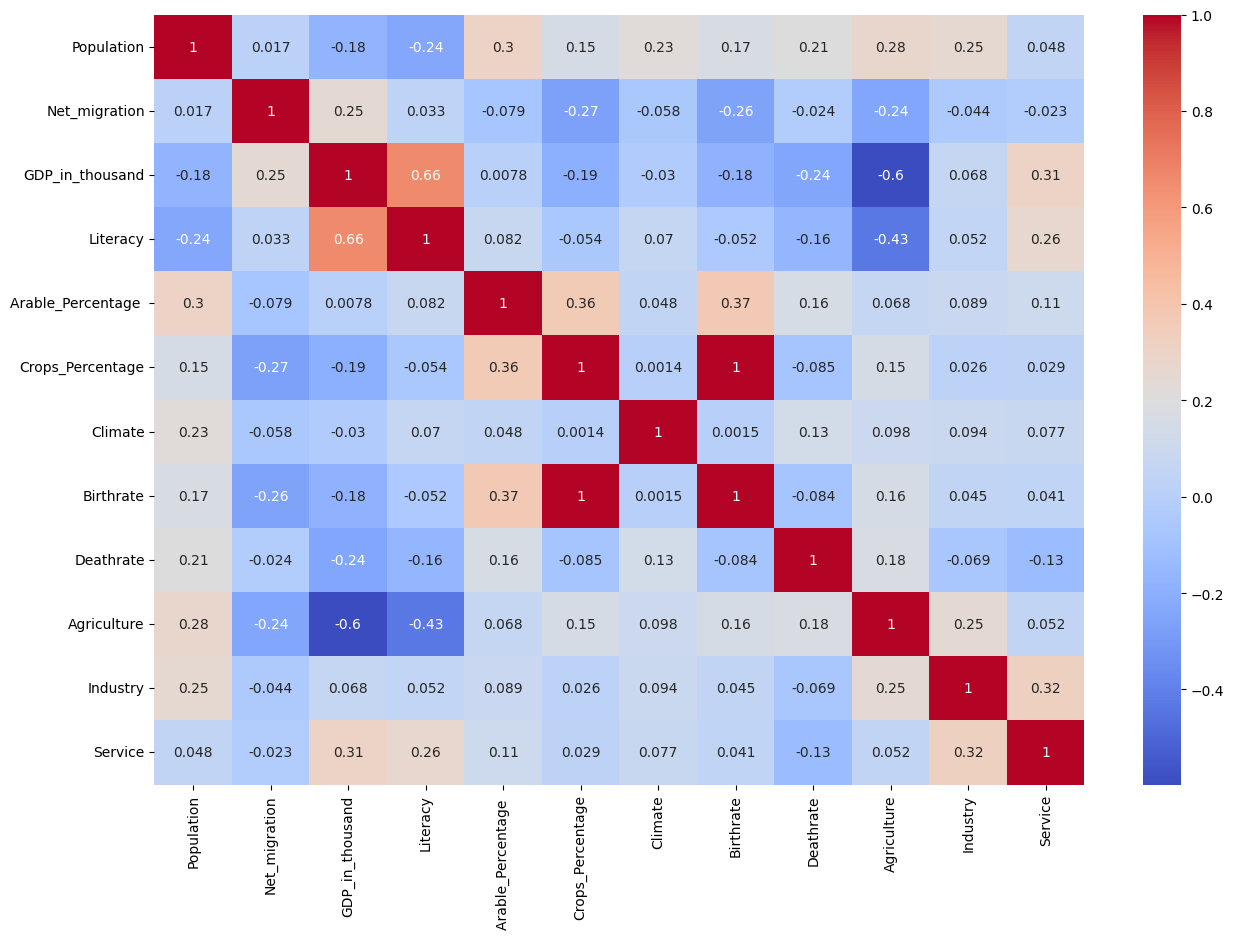

In [74]:
### Plotting the correlation between various columns of the filter_dataset
import matplotlib.pyplot as plt
cr['GDP_in_thousand']

plt.figure(figsize=(15,10))
sns.heatmap(cr,annot=True,cmap="coolwarm");

In [75]:
# Drop Uneccessary columns

modified_data=modified_data.drop(['Arable_Percentage '], axis=1)
modified_data=modified_data.drop(['Climate'], axis=1)



In [76]:
modified_data=modified_data.drop(['Population'], axis=1)
modified_data=modified_data.drop(['Birthrate'], axis=1)

# 5. Modelling

# 5.1 Splitting the data to Training and Test sets

In [77]:
import sklearn

from sklearn.model_selection import train_test_split

In [78]:
data_X = modified_data.iloc[:,[0,2,3,4,5,6,7]]

data_y = modified_data[:]['GDP_in_thousand']


data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Net_migration     227 non-null    float64
 1   Literacy          227 non-null    float64
 2   Crops_Percentage  227 non-null    float64
 3   Deathrate         227 non-null    float64
 4   Agriculture       227 non-null    float64
 5   Industry          227 non-null    float64
 6   Service           227 non-null    float64
dtypes: float64(7)
memory usage: 12.5 KB


In [79]:
x_train, x_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 60 to 102
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Net_migration     181 non-null    float64
 1   Literacy          181 non-null    float64
 2   Crops_Percentage  181 non-null    float64
 3   Deathrate         181 non-null    float64
 4   Agriculture       181 non-null    float64
 5   Industry          181 non-null    float64
 6   Service           181 non-null    float64
dtypes: float64(7)
memory usage: 11.3 KB


In [80]:
type(x_test)

pandas.core.frame.DataFrame

In [81]:
x_train

,Net_migration,Literacy,Crops_Percentage,Deathrate,Agriculture,Industry,Service
60,0.471510,0.124323,0.383427,0.422172,0.619725,0.690586,0.514737
164,0.557548,0.769439,0.729002,0.109223,0.436824,0.597759,0.704211
68,0.498070,1.000000,0.098818,0.667568,0.341372,0.622400,0.707368
183,0.476504,0.011236,0.454406,1.000000,0.424419,0.170081,0.017895
216,0.437457,0.973806,0.446233,0.567064,0.796702,0.541678,0.041053
...,...,...,...,...,...,...,...
106,0.400454,0.940872,0.147326,0.646350,0.475056,0.720504,0.571579
14,0.471510,0.843627,0.125930,0.628235,0.088597,0.060142,0.005263
92,0.496027,0.977517,0.555758,0.815099,0.381574,0.641733,0.681053
179,0.414983,0.406141,0.205255,0.244513,0.364800,0.924770,0.368421


In [82]:
### Looking at the new test data - Y

y_train

60     0.446081
164    0.813587
68     0.923660
183    0.000000
216    0.254303
         ...   
106    0.552858
14     0.794301
92     0.747528
179    0.706309
102    0.440233
Name: GDP_in_thousand, Length: 181, dtype: float64

# 5.2 Fit the model

In [83]:
### Dictionary to store model and its rmse

model_rmse = OrderedDict()

In [84]:
### Dictionary to store model and its r-squared

model_r2 = OrderedDict()

#  Applying Multi Linear Regression

In [85]:
### Training the Multi Linear Regression model on the Training set

linear_regressor = LinearRegression()
lr=linear_regressor
lr.fit(x_train, y_train)

LinearRegression()

In [86]:
### Predicting the Test set results

Y_pred = linear_regressor.predict(x_test)

In [87]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, Y_pred), 3)

model_rmse['Multi Linear Regression'] = rmse
model_r2['Multi Linear Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 0.148
R-squared value of the model is : 0.697


In [88]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

# Train the model using the training sets

lr.fit(x_train,y_train)

LinearRegression()

In [89]:
lr.intercept_

0.31194103345971846

In [90]:
lr.coef_

array([ 0.28637901,  0.35349571, -0.12458253, -0.06344155, -0.45764307,
        0.10081912,  0.19834082])

In [91]:
#x_train = sm.add_constant(x_train)
#model = sm.OLS(y_train, x_train).fit()
#print(model.summary())

# Next Step Runing Other Algorisms   Decision tree, XGboost, SVM, KNN and Random Forest.

#  Applying Support Vector Machine Algorithm

In [92]:
### Training the Support Vector Regression model on the Training set
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

support_vector_regressor = SVR(kernel = 'linear')
support_vector_regressor.fit(x_train, y_train)

SVR(kernel='linear')

In [93]:
support_vector_regressor.fit(x_train, y_train)

SVR(kernel='linear')

In [94]:
# Split data in to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=0)

In [95]:
# Apply SVM Model
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
svc=SVR(kernel = 'linear')
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
#print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred),2))

In [96]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

model_rmse['Support Vector Regression'] = rmse
model_r2['Support Vector Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 0.23
R-squared value of the model is : 0.283


# Applying For Decision Tree Algorithm 

In [97]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor()

In [98]:
# Split data in to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=70)

In [99]:
### Training the Decision Tree Regression model on the Training set

decision_tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [100]:
### Predicting the Test set results

y_pred = decision_tree_regressor.predict(x_test)

In [101]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

model_rmse['Decision Tree Regression'] = rmse
model_r2['Decision Tree Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 0.164
R-squared value of the model is : 0.695


# Applying For Random Forest Algorithm

In [102]:
from sklearn.ensemble import RandomForestRegressor

## Applying Random Forest Regression (10 trees)

In [103]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [104]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(x_test)

In [105]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, Y_pred), 3)

model_rmse['Random Forest Regression (10 trees)'] = rmse
model_r2['Random Forest Regression (10 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 0.152
R-squared value of the model is : 0.732


## Applying Random Forest (25 Trees)

In [106]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 25, random_state = 42)
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=42)

In [107]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(x_test)

In [108]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, Y_pred), 3)

model_rmse['Random Forest Regression (25 trees)'] = rmse
model_r2['Random Forest Regression (25 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 0.155
R-squared value of the model is : 0.719


## Applying for Random Forest (100 Trees)

In [109]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [110]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(x_test)

In [111]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, Y_pred), 3)

model_rmse['Random Forest Regression (100 trees)'] = rmse
model_r2['Random Forest Regression (100 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 0.152
R-squared value of the model is : 0.739


## Applying for Random Forest (50 Trees)

In [112]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 50, random_state = 42)
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [113]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(x_test)

In [114]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, Y_pred), 3)

model_rmse['Random Forest Regression (50 trees)'] = rmse
model_r2['Random Forest Regression (50 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 0.155
R-squared value of the model is : 0.724


## Applying for Random Forest (1000 Trees)

In [115]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [116]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(x_test)

In [117]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, Y_pred), 3)

model_rmse['Random Forest Regression (1000 trees)'] = rmse
model_r2['Random Forest Regression (1000 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 0.152
R-squared value of the model is : 0.735


# XGBoost Algorithm

In [118]:
%pip install xgboost -q

Note: you may need to restart the kernel to use updated packages.


In [119]:
import xgboost as xg

## Applying XGBoost 

In [120]:
### Training the XGBoost Regression model on the Training set

xgboost_regressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 42)
xgboost_regressor.fit(x_train, y_train)

c:\Users\vanna\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\vanna\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


c:\Users\vanna\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:364: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[14:17:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=42, reg_alpha=0, ...)

In [121]:
### Predicting the Test set results

Y_pred = xgboost_regressor.predict(x_test)

c:\Users\vanna\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\vanna\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


In [122]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, Y_pred), 3)

model_rmse['XGBoost Regression'] = rmse
model_r2['XGBoost Regression'] = r2_value
accuracy_score=xgboost_regressor.score(x_test,y_test)

print(f"XGBoost Model Accuracy:{accuracy_score:.2f}")
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

XGBoost Model Accuracy:0.73
Root Mean Squared Error of the model is : 0.155
R-squared value of the model is : 0.729


c:\Users\vanna\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\vanna\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


# Applying for K-Nearest Neighbors

In [123]:
from sklearn.neighbors import KNeighborsRegressor # Import KNeighbersRegression 
from sklearn.model_selection import train_test_split

In [124]:
# Split data in to train and test 

x_train, x_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

In [125]:
# create a K-Nearest Neighbrs Model
K=7 # I choose the value of K based on my requirements
model=KNeighborsRegressor(n_neighbors=K)


In [126]:
#Training the Model
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [127]:
### Predicting the Test set results

Y_pred = model.predict(x_test)

In [128]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, Y_pred), 3)

model_rmse['KNeighbors Regression'] = rmse
model_r2['KNeighbors Regression'] = r2_value
accuracy_score=model.score(x_test,y_test)

print(f"K-Nearest Neighbors Model Accuracy:{accuracy_score:.2f}")
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))


K-Nearest Neighbors Model Accuracy:0.71
Root Mean Squared Error of the model is : 0.145
R-squared value of the model is : 0.707


# Modeling Evaluation

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

# RMSE, R-squared of the models

Now we will tabulate all the models along with their RMSE, R-Squared. This data is stored in the model_rmse, model_r2 dictionary. We will use the tabulate package for tabulating the results.

In [129]:
### Looking at the model rmse dictionary

model_rmse

OrderedDict([('Multi Linear Regression', 0.148),
             ('Support Vector Regression', 0.23),
             ('Decision Tree Regression', 0.164),
             ('Random Forest Regression (10 trees)', 0.152),
             ('Random Forest Regression (25 trees)', 0.155),
             ('Random Forest Regression (100 trees)', 0.152),
             ('Random Forest Regression (50 trees)', 0.155),
             ('Random Forest Regression (1000 trees)', 0.152),
             ('XGBoost Regression', 0.155),
             ('KNeighbors Regression', 0.145)])

In [130]:
### Looking at the model r-squared dictionary

model_r2

OrderedDict([('Multi Linear Regression', 0.697),
             ('Support Vector Regression', 0.283),
             ('Decision Tree Regression', 0.695),
             ('Random Forest Regression (10 trees)', 0.732),
             ('Random Forest Regression (25 trees)', 0.719),
             ('Random Forest Regression (100 trees)', 0.739),
             ('Random Forest Regression (50 trees)', 0.724),
             ('Random Forest Regression (1000 trees)', 0.735),
             ('XGBoost Regression', 0.729),
             ('KNeighbors Regression', 0.707)])

In [131]:
%pip install tabulate -q

Note: you may need to restart the kernel to use updated packages.


In [132]:
### Tabulating the results

from tabulate import tabulate

In [133]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Root Mean Squared Error', 'R-squared'])
count = 1

for model in model_rmse:
    row = [count, model, model_rmse[model], model_r2[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═══════════════════════════════════════╤═══════════════════════════╤═════════════╕
│   S.No. │ Classification Model                  │   Root Mean Squared Error │   R-squared │
╞═════════╪═══════════════════════════════════════╪═══════════════════════════╪═════════════╡
│       1 │ Multi Linear Regression               │                     0.148 │       0.697 │
├─────────┼───────────────────────────────────────┼───────────────────────────┼─────────────┤
│       2 │ Support Vector Regression             │                     0.23  │       0.283 │
├─────────┼───────────────────────────────────────┼───────────────────────────┼─────────────┤
│       3 │ Decision Tree Regression              │                     0.164 │       0.695 │
├─────────┼───────────────────────────────────────┼───────────────────────────┼─────────────┤
│       4 │ Random Forest Regression (10 trees)   │                     0.152 │       0.732 │
├─────────┼───────────────────────────────────────┼─────────

From the above table, we can see that the model XGBoost has the least Root Mean Squared Error of 0.152 and the highest R-squared value of 0.7.735

# Conclusion 

Hence, for this problem, we will use Random Forest Regression to predict GDP.